## Dependencies

In [1]:
import ee # Google earth engine
import geemap # Allows for interactive mapping with earth engine
import pandas as pd # Manipulate data in the form of spreadsheets
import matplotlib.pyplot as plt # plotting 
from matplotlib.pyplot import imshow # plotting 
import numpy as np # Math library
import multiprocessing as mp # Multiprocessing
import pickle # Convienent way to store variables from RAM to disk
import seaborn as sns # plotting
import random # for random number generation
import time

import warnings # Remove some annoying warnings (optional)
warnings.filterwarnings('ignore')

In [2]:
#ee.Authenticate()
ee.Initialize() # Initialize earth engine

## Explanatory Variables______________________


### Real Valued Variables

#### Slope (does not change annually)
<img src="../Crop_Yield/slope.PNG"  width="250" height="250">

* In [1], slope was found to be the most important criterion for predicting land suitability. Slope is a proxy for the susceptibility of land to soil erosion, field traffic, and the topographic wetness index (liklihood of area to collect water).

* Slope was calculated using ALOS AW3D30 elevation data as it was found to be the most accurate digital elevation model on google earth engine by [2].

#### Aspect (does not change annually)
<img src="../Crop_Yield/aspect.PNG"  width="250" height="250">

* Aspect is a proxy for how much sunlight a region is getting. In the northern hemisphere, the north side of slopes is often more shaded than the southern side [3].

* Aspect was calculated using ALOS AW3D30 elevation data as it was found to be the most accurate digital elevation model on google earth engine by [2].

#### Soil Water Content (does not change annually)
<img src="../Crop_Yield/soil_water.PNG"  width="250" height="250">

* Measures how good the soil is at holding water. When soil becomes too dry, plant transpiration drops.

#### Soil Organic Carbon (does not change annually)
<img src="../Crop_Yield/oc.PNG"  width="250" height="250">

* Directly linked to organic matter content in soil. Organic matter helps with water retention and soil ecosystem

#### Soil pH (does not change annually)
<img src="../Crop_Yield/pH.PNG"  width="250" height="250">

* Availability of nutrient elements, microbial activity.

#### Soil Bulk Density (does not change annually)
<img src="../Crop_Yield/bulk_density.PNG"  width="250" height="250">

* Soil compaction, aeration, infiltration.



#### Precipitation (changes annually)
<img src="../Crop_Yield/precipitation.PNG"  width="250" height="250">

<img src="../Crop_Yield/grow_season.PNG"  width="600" height="600">


* The total precipitation during the growing season. The growing season in Canada is, on average, 3 months long (https://www.nrcan.gc.ca/climate-change/impacts-adaptations/climate-change-impacts-forests/forest-change-indicators/growing-season/18470).

* Growing season length is calculated as the number of days between the last occurrence of 0°C in spring and the first occurrence of 0°C in fall. It varies for each province. June, July, August are overlapping growing season months for all provinces.


#### Temperature (changes annually)
<img src="../Crop_Yield/landsat.PNG"  width="250" height="250">


* The Landsat 8 sataset is mainly imagery, but also contains a band that measures the surface temperature in kelvins.
* The total/sum of the daily temperatures during the growing season will be used as an explanatory variable.



#### GLDAS variables (changes annually)
More info here - https://ldas.gsfc.nasa.gov/gldas/.
* air temperature
* humidity
* soil moisture





### Class Valued Variables

#### Soil Texture (does not change annually)
<img src="../Crop_Yield/texture.PNG"  width="250" height="250">

* A similar covariate to bulk density. it influences aeration, water movement and storage, nutrient holding capacity and erodibility.




### References
[1] Özkan, Barış, Orhan Dengiz, and İnci Demirağ Turan. "Site suitability analysis for potential agricultural land with spatial fuzzy multi-criteria decision analysis in regional scale under semi-arid terrestrial ecosystem." Scientific Reports 10.1 (2020): 1-18.


[2] Ravanelli, Roberta, Andrea Nascetti, and Mattia Crespi. "Large Scale Assessment of Free Global DEMs Through the Google Earth Engine Platform." IGARSS 2020-2020 IEEE International Geoscience and Remote Sensing Symposium. IEEE, 2020.


[3] Barbour, et al. (1999) Terrestrial Plant Ecology, 3rd Ed. Benjamin/Cummings. Chapter 14. pp. 390-391



### Visualize Data (Optional)

In [3]:
Map = geemap.Map()

# Add pH data to map
pH = ee.Image("OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02")
pH_visualization = {
  'bands': ['b30'],
  'min': 42.0,
  'max': 110.0,
  'palette': [
    "FF0000","FF1C00","FF3900","FF5500","FF7100","FF8E00",
    "FFAA00","FFC600","FFE200","FFFF00","E3FF00","C7FF00",
    "AAFF00","8EFF00","72FF00","55FF00","39FF00","1DFF00",
    "01FF00","00FF1C","00FF38","00FF54","00FF71","00FF8D",
    "00FFA9","00FFC6","00FFE2","00FFFE","00E3FF","00C7FF",
    "00ABFF","008FFF","0072FF","0056FF","003AFF","001DFF",
    "0001FF","1B00FF","3800FF","5400FF",
  ]
}
Map.addLayer(pH, pH_visualization, "Soil pH x 10 in H2O", opacity=0.5)


# Add texture data to map
texture = ee.Image("OpenLandMap/SOL/SOL_TEXTURE-CLASS_USDA-TT_M/v02")
visualization = {
  'bands': ['b0'],
  'min': 1.0,
  'max': 12.0,
  'palette': [
    "d5c36b","b96947","9d3706","ae868f","f86714","46d143",
    "368f20","3e5a14","ffd557","fff72e","ff5a9d","ff005b",
  ]
}
Map.addLayer(texture, visualization, "Soil texture class (USDA system)")


# Organic carbon
oc = ee.Image("OpenLandMap/SOL/SOL_ORGANIC-CARBON_USDA-6A1C_M/v02")
visualization = {
  'bands': ['b0'],
  'min': 0.0,
  'max': 120.0,
  'palette': [
    "ffffa0","f7fcb9","d9f0a3","addd8e","78c679","41ab5d",
    "238443","005b29","004b29","012b13","00120b",
  ]
}
Map.addLayer(oc, visualization, "Soil organic carbon content in x 5 g / kg")


# Bulk density
bulk = ee.Image("OpenLandMap/SOL/SOL_BULKDENS-FINEEARTH_USDA-4A1H_M/v02")
visualization = {
  'bands': ['b0'],
  'min': 5.0,
  'max': 185.0,
  'palette': ['5e3c99', 'b2abd2', 'f7e0b2', 'fdb863', 'e63b01']
}
Map.addLayer(bulk, visualization, "Soil bulk density in x 10 kg / m3")


# Add Agriculture and Agri-Food Canada annual crop inventory
AAFC = ee.ImageCollection('AAFC/ACI')
AAFC = AAFC.filter(ee.Filter.date('2014-01-01', '2014-12-31')).first()
Map.addLayer(AAFC, {}, 'AAFC')


# Precipitation
precipitation = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06').filterDate('2010-01-01', '2010-12-31')
precipitation = precipitation.select('precipitation').reduce(ee.Reducer.sum())
Map.addLayer(precipitation, {}, 'GPM_Precipitation')


# Surface temperature
surface_temp = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate('2013-06-01', '2013-08-31')
surface_temp = surface_temp.select('ST_B10').reduce(ee.Reducer.sum())
Map.addLayer(surface_temp, {}, "surface_temp");


# Elevation: slope and aspect
elevation = ee.ImageCollection('JAXA/ALOS/AW3D30/V3_2').select('DSM')
proj_slope = elevation.first().select(0).projection()
slope = ee.Terrain.slope(elevation.mosaic().setDefaultProjection(proj_slope))
aspect = ee.Terrain.aspect(elevation.mosaic().setDefaultProjection(proj_slope))


# Soil Water Content
soil_water_content = ee.Image("OpenLandMap/SOL/SOL_WATERCONTENT-33KPA_USDA-4B1C_M/v01")
visualization = {
  'bands': ['b0'],
  'min': 0.0,
  'max': 52.9740182135385,
  'palette': [
    "d29642","eec764","b4ee87","32eeeb","0c78ee","2601b7",
    "083371",
  ]
}
Map.addLayer(soil_water_content, visualization, "Soil water content at 33kPa (field capacity)")


# Air Temp
air_temp = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate('2013-06-01', '2013-08-31')
air_temp = air_temp.select('Tair_f_inst').reduce(ee.Reducer.sum())
Map.addLayer(air_temp, {}, 'air temp')


# Humidity
humidity = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate('2013-06-01', '2013-08-31')
humidity = humidity.select('Qair_f_inst').reduce(ee.Reducer.sum())
Map.addLayer(humidity, {}, 'humidity')


# Soil Moisture
soil_moisture = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate('2013-06-01', '2013-08-31')
soil_moisture = soil_moisture.select('SoilMoi10_40cm_inst').reduce(ee.Reducer.sum())
Map.addLayer(soil_moisture, {}, 'soil_moisture')



#Example Shapefile
CAR = ee.FeatureCollection('users/amanjotbhullar/lcar000a16a_e')
Map.centerObject(CAR)
Map.addLayer(CAR, {}, '2016_CARs')




Map

Map(center=[63.70959315570848, -95.1184571960103], controls=(WidgetControl(options=['position'], widget=HBox(c…

### Load Shapefiles

In [4]:
CAR_2011 = ee.FeatureCollection('users/amanjotbhullar/gcar000a11a_e') # 2011 file for years 2013-2016
CAR_2016 = ee.FeatureCollection('users/amanjotbhullar/lcar000a16a_e') # 2016 file for years 2017-2020
CD = ee.FeatureCollection('users/amanjotbhullar/census_division_2016') # This one is good for 2013-2020

### Determine SAD Polygons

* The SAD polygons are a combination of the Census Agriculture Region (CAR) polygons and the Census Division (CD) polygons.

* There are a set of polygons that correspond to the SAD regions for the years 2013, 2014, 2015, 2016. There is another set for the years 2017. 2018, 2019, 2020.



### Mapping Table 
Maps CAR Region to SAD. Not all SAD regions will be a combination of CARs, so the below mapping is not complete.

In [5]:
# Below table for 2017-2020
Table_CAR_2017 = [['Québec', True],
                   ['Bas-Saint-Laurent and Gaspésie-Îles de-la-Madeleine, 1 - Québec', 2401, 2411],
                   ['Saguenay-Lac-Saint-Jean and Côte-Nord, 2 - Québec', 2402],
                   ['Capitale nationale and Mauricie, 3 - Québec', 2403, 2404],
                   ['Estrie, 4 - Québec', 2405], 
                   ['Montréal, Laval and Lanaudière, 5 - Québec', 2406, 2407],
                   ['Outaouais and Laurentides, 6 - Québec', 2408, 2409],
                   ['Chaudières-Appalaches, 8 - Québec', 2412],
                   ['Montérégie Nord-est, 9 - Québec', True],
                   ['Montérégie Sud-ouest, 10 - Québec', True],
                   ['Centre-du-Québec, 11 - Québec', 2414],
            #          ['Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec', 2410],
                     ['Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec', True],

             ['Ontario', True],
                   ['Southern Ontario Region 1 - Ontario', 3501],
                   ['Western Ontario Region 2 - Ontario', 3502],
                   ['Central Ontario Region 3 - Ontario', 3503],
                   ['Eastern Ontario Region 4 - Ontario', 3504], 
                    ['Northern Ontario Region 5 - Ontario', True],

            #          ['Northern Ontario Region 5 - Ontario', 3505],
             ['Manitoba', True],
                   ['Small Area Data Region 1 - Manitoba', 4601],
                   ['Small Area Data Region 2 - Manitoba', 4602],
                   ['Small Area Data Region 3 - Manitoba', 4603],
                   ['Small Area Data Region 4 - Manitoba', 4604],
                   ['Small Area Data Region 5 - Manitoba', 4605],
                   ['Small Area Data Region 6 - Manitoba', 4606],
                   ['Small Area Data Region 7 - Manitoba', 4607],
                   ['Small Area Data Region 8 - Manitoba', 4608],
                   ['Small Area Data Region 9 - Manitoba', 4609],
                   ['Small Area Data Region 10 - Manitoba', 4610],
                   ['Small Area Data Region 11 - Manitoba', 4611],
            #        ['Small Area DataRegion 12 - Manitoba', 4612], 
                   ['Small Area DataRegion 12 - Manitoba', True], 

             ['Saskatchewan', True],
                   ['Small Area Data Region 1 - Saskatchewan', True],
                   ['Small Area Data Region 2 - Saskatchewan', True],
                   ['Small Area Data Region 3 - Saskatchewan', True],
                   ['Small Area Data Region 4 - Saskatchewan', True],
                   ['Small Area Data Region 5 - Saskatchewan', True],
                   ['Small Area Data Region 6 - Saskatchewan', True],
                   ['Small Area Data Region 7 - Saskatchewan', True],
                   ['Small Area Data Region 8 - Saskatchewan', True],
                   ['Small Area Data Region 9 - Saskatchewan', True],
                   ['Small Area Data Region 10 - Saskatchewan', True],
                   ['Small Area Data Region 11 - Saskatchewan', True],
                   ['Small Area Data Region 12 - Saskatchewan', True],
                   ['Small Area Data Region 13 - Saskatchewan', True],
                   ['Small Area Data Region 14 - Saskatchewan', True],
                   ['Small Area Data Region 15 - Saskatchewan', True],
                   ['Small Area Data Region 16 - Saskatchewan', True],
                   ['Small Area Data Region 17 - Saskatchewan', True],
                   ['Small Area Data Region 18 - Saskatchewan', True],
                   ['Small Area Data Region 19 - Saskatchewan', True],
                   ['Small Area Data Region 20 - Saskatchewan', True], 
             ['Alberta', True],
                   ['Small Area Data Region 10 - Alberta', 4810],
                   ['Small Area Data Region 20 - Alberta', 4820],
                   ['Small Area Data Region 30 - Alberta', 4830],
                   ['Small Area Data Region 40 - Alberta', 4840],
                   ['Small Area Data Region 41 - Alberta', 4841],
                   ['Small Area Data Region 50 - Alberta', 4850],
            #        ['Small Area Data Region 60 - Alberta', 4860],
            #        ['Small Area Data Region 70 - Alberta', 4870], 
                   ['Small Area Data Region 60 - Alberta', True],
                   ['Small Area Data Region 70 - Alberta', True], 
             ['British Columbia', True],
                   ['Non Peace, 1 - British Columbia', True],
            #        ['Peace River, 8 - British Columbia', 5908],
                   ['Peace River, 8 - British Columbia', True],
                   ['Small Area Data Region 1 - Saskatchewan (corresponds to Census Division 1 from 2016 Census of Agriculture', True],
                   ['Small Area Data Region 2 - Saskatchewan (corresponds to Census Division 2 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 3 - Saskatchewan (corresponds to Census Division 3 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 4 - Saskatchewan (corresponds to Census Division 4 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 5 - Saskatchewan (corresponds to Census Division 5 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 6 - Saskatchewan (corresponds to Census Division 6 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 7 - Saskatchewan (corresponds to Census Division 7 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 8 - Saskatchewan (corresponds to Census Division 8 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 9 - Saskatchewan (corresponds to Census Division 9 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 10 - Saskatchewan (corresponds to Census Division 10 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 11 - Saskatchewan (corresponds to Census Division 11 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 12 - Saskatchewan (corresponds to Census Division 12 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 13 - Saskatchewan (corresponds to Census Division 13 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 14 - Saskatchewan (corresponds to Census Division 14 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 15 - Saskatchewan (corresponds to Census Division 15 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 16 - Saskatchewan (corresponds to Census Divisions 16 and 18 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 17 - Saskatchewan (corresponds to Census Division 17 from 2016 Census of Agriculture)', True]]



Table_CAR_2013 = [['Québec', True],
                   ['Bas-Saint-Laurent and Gaspésie-Îles de-la-Madeleine, 1 - Québec', 240100000, 241100000],
                   ['Saguenay-Lac-Saint-Jean and Côte-Nord, 2 - Québec', 240200000],
                   ['Capitale nationale and Mauricie, 3 - Québec', 240300000, 240400000],
                   ['Estrie, 4 - Québec', 240500000], 
                   ['Montréal, Laval and Lanaudière, 5 - Québec', 240600000, 240700000],
                   ['Outaouais and Laurentides, 6 - Québec', 240800000, 240900000],
                   ['Chaudières-Appalaches, 8 - Québec', 241200000],
                   ['Montérégie Nord-est, 9 - Québec', True],
                   ['Montérégie Sud-ouest, 10 - Québec', True],
                   ['Centre-du-Québec, 11 - Québec', 241400000],
            #          ['Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec', 2410],
                     ['Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec', True],

             ['Ontario', True],
                   ['Southern Ontario Region 1 - Ontario', 350100000],
                   ['Western Ontario Region 2 - Ontario', 350200000],
                   ['Central Ontario Region 3 - Ontario', 350300000],
                   ['Eastern Ontario Region 4 - Ontario', 350400000], 
                    ['Northern Ontario Region 5 - Ontario', True],

            #          ['Northern Ontario Region 5 - Ontario', 3505],
             ['Manitoba', True],
                   ['Small Area Data Region 1 - Manitoba', 460100000],
                   ['Small Area Data Region 2 - Manitoba', 460200000],
                   ['Small Area Data Region 3 - Manitoba', 460300000],
                   ['Small Area Data Region 4 - Manitoba', 460400000],
                   ['Small Area Data Region 5 - Manitoba', 460500000],
                   ['Small Area Data Region 6 - Manitoba', 460600000],
                   ['Small Area Data Region 7 - Manitoba', 460700000],
                   ['Small Area Data Region 8 - Manitoba', 460800000],
                   ['Small Area Data Region 9 - Manitoba', 460900000],
                   ['Small Area Data Region 10 - Manitoba', 461000000],
                   ['Small Area Data Region 11 - Manitoba', 461100000],
            #        ['Small Area DataRegion 12 - Manitoba', 4612], 
                   ['Small Area DataRegion 12 - Manitoba', True], 

             ['Saskatchewan', True],
                   ['Small Area Data Region 1 - Saskatchewan', 471000000],
                   ['Small Area Data Region 2 - Saskatchewan', 471100000],
                   ['Small Area Data Region 3 - Saskatchewan', 472000000],
                   ['Small Area Data Region 4 - Saskatchewan', 472100000],
                   ['Small Area Data Region 5 - Saskatchewan', 473000000],
                   ['Small Area Data Region 6 - Saskatchewan', 473100000],
                   ['Small Area Data Region 7 - Saskatchewan', 473200000],
                   ['Small Area Data Region 8 - Saskatchewan', 473300000],
                   ['Small Area Data Region 9 - Saskatchewan', 474000000],
                   ['Small Area Data Region 10 - Saskatchewan', 474100000],
                   ['Small Area Data Region 11 - Saskatchewan', 475000000],
                   ['Small Area Data Region 12 - Saskatchewan', 475100000],
                   ['Small Area Data Region 13 - Saskatchewan', 476000000],
                   ['Small Area Data Region 14 - Saskatchewan', 476100000],
                   ['Small Area Data Region 15 - Saskatchewan', 477000000],
                   ['Small Area Data Region 16 - Saskatchewan', 477100000],
                   ['Small Area Data Region 17 - Saskatchewan', 478000000],
                   ['Small Area Data Region 18 - Saskatchewan', 478100000],
                   ['Small Area Data Region 19 - Saskatchewan', True],
                   ['Small Area Data Region 20 - Saskatchewan', 479100000], 
             ['Alberta', True],
                   ['Small Area Data Region 10 - Alberta', 481000000],
                   ['Small Area Data Region 20 - Alberta', 482000000],
                   ['Small Area Data Region 30 - Alberta', 483000000],
                   ['Small Area Data Region 40 - Alberta', 484000000],
                   ['Small Area Data Region 41 - Alberta', 484100000],
                   ['Small Area Data Region 50 - Alberta', 485000000],
            #        ['Small Area Data Region 60 - Alberta', 4860],
            #        ['Small Area Data Region 70 - Alberta', 4870], 
                   ['Small Area Data Region 60 - Alberta', True],
                   ['Small Area Data Region 70 - Alberta', True], 
             ['British Columbia', True],
                   ['Non Peace, 1 - British Columbia', True],
            #        ['Peace River, 8 - British Columbia', 5908],
                   ['Peace River, 8 - British Columbia', True],
                   ['Small Area Data Region 1 - Saskatchewan (corresponds to Census Division 1 from 2016 Census of Agriculture', True],
                   ['Small Area Data Region 2 - Saskatchewan (corresponds to Census Division 2 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 3 - Saskatchewan (corresponds to Census Division 3 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 4 - Saskatchewan (corresponds to Census Division 4 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 5 - Saskatchewan (corresponds to Census Division 5 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 6 - Saskatchewan (corresponds to Census Division 6 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 7 - Saskatchewan (corresponds to Census Division 7 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 8 - Saskatchewan (corresponds to Census Division 8 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 9 - Saskatchewan (corresponds to Census Division 9 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 10 - Saskatchewan (corresponds to Census Division 10 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 11 - Saskatchewan (corresponds to Census Division 11 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 12 - Saskatchewan (corresponds to Census Division 12 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 13 - Saskatchewan (corresponds to Census Division 13 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 14 - Saskatchewan (corresponds to Census Division 14 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 15 - Saskatchewan (corresponds to Census Division 15 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 16 - Saskatchewan (corresponds to Census Divisions 16 and 18 from 2016 Census of Agriculture)', True],
                   ['Small Area Data Region 17 - Saskatchewan (corresponds to Census Division 17 from 2016 Census of Agriculture)', True]]

Map Census Division to SAD

In [6]:
Table_CD_2017 = [['Québec', True],
               ['Bas-Saint-Laurent and Gaspésie-Îles de-la-Madeleine, 1 - Québec', True],
               ['Saguenay-Lac-Saint-Jean and Côte-Nord, 2 - Québec', True],
               ['Capitale nationale and Mauricie, 3 - Québec', True],
               ['Estrie, 4 - Québec', True], 
               ['Montréal, Laval and Lanaudière, 5 - Québec', True],
               ['Outaouais and Laurentides, 6 - Québec', True],
               ['Chaudières-Appalaches, 8 - Québec', True],
               ['Montérégie Nord-est, 9 - Québec', 2446, 2447, 2448, 2453, 2454, 2455, 2457, 2458, 2459],
               ['Montérégie Sud-ouest, 10 - Québec', 2456, 2467, 2468, 2469, 2470, 2471],
               ['Centre-du-Québec, 11 - Québec', True],
                 ['Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec', True],
         ['Ontario', True],
               ['Southern Ontario Region 1 - Ontario', True],
               ['Western Ontario Region 2 - Ontario', True],
               ['Central Ontario Region 3 - Ontario', True],
               ['Eastern Ontario Region 4 - Ontario', True], 
                 ['Northern Ontario Region 5 - Ontario', True],
         ['Manitoba', True],
               ['Small Area Data Region 1 - Manitoba', True],
               ['Small Area Data Region 2 - Manitoba', True],
               ['Small Area Data Region 3 - Manitoba', True],
               ['Small Area Data Region 4 - Manitoba', True],
               ['Small Area Data Region 5 - Manitoba', True],
               ['Small Area Data Region 6 - Manitoba', True],
               ['Small Area Data Region 7 - Manitoba', True],
               ['Small Area Data Region 8 - Manitoba', True],
               ['Small Area Data Region 9 - Manitoba', True],
               ['Small Area Data Region 10 - Manitoba', True],
               ['Small Area Data Region 11 - Manitoba', True],
               ['Small Area DataRegion 12 - Manitoba', True], 
         ['Saskatchewan', True],
               ['Small Area Data Region 1 - Saskatchewan', True],
               ['Small Area Data Region 2 - Saskatchewan', True],
               ['Small Area Data Region 3 - Saskatchewan', True],
               ['Small Area Data Region 4 - Saskatchewan', True],
               ['Small Area Data Region 5 - Saskatchewan', True],
               ['Small Area Data Region 6 - Saskatchewan', True],
               ['Small Area Data Region 7 - Saskatchewan', True],
               ['Small Area Data Region 8 - Saskatchewan', True],
               ['Small Area Data Region 9 - Saskatchewan', True],
               ['Small Area Data Region 10 - Saskatchewan', True],
               ['Small Area Data Region 11 - Saskatchewan', True],
               ['Small Area Data Region 12 - Saskatchewan', True],
               ['Small Area Data Region 13 - Saskatchewan', True],
               ['Small Area Data Region 14 - Saskatchewan', True],
               ['Small Area Data Region 15 - Saskatchewan', True],
               ['Small Area Data Region 16 - Saskatchewan', True],
               ['Small Area Data Region 17 - Saskatchewan', True],
               ['Small Area Data Region 18 - Saskatchewan', True],
               ['Small Area Data Region 19 - Saskatchewan', True],
               ['Small Area Data Region 20 - Saskatchewan', True], 
         ['Alberta', True],
               ['Small Area Data Region 10 - Alberta', True],
               ['Small Area Data Region 20 - Alberta', True],
               ['Small Area Data Region 30 - Alberta', True],
               ['Small Area Data Region 40 - Alberta', True],
               ['Small Area Data Region 41 - Alberta', True],
               ['Small Area Data Region 50 - Alberta', True],
               ['Small Area Data Region 60 - Alberta', True],
               ['Small Area Data Region 70 - Alberta', True], 
         ['British Columbia', True],
               ['Non Peace, 1 - British Columbia', True],
               ['Peace River, 8 - British Columbia', True],
               ['Small Area Data Region 1 - Saskatchewan (corresponds to Census Division 1 from 2016 Census of Agriculture', 4701],
               ['Small Area Data Region 2 - Saskatchewan (corresponds to Census Division 2 from 2016 Census of Agriculture)', 4702],
               ['Small Area Data Region 3 - Saskatchewan (corresponds to Census Division 3 from 2016 Census of Agriculture)', 4703],
               ['Small Area Data Region 4 - Saskatchewan (corresponds to Census Division 4 from 2016 Census of Agriculture)', 4704],
               ['Small Area Data Region 5 - Saskatchewan (corresponds to Census Division 5 from 2016 Census of Agriculture)', 4705],
               ['Small Area Data Region 6 - Saskatchewan (corresponds to Census Division 6 from 2016 Census of Agriculture)', 4706],
               ['Small Area Data Region 7 - Saskatchewan (corresponds to Census Division 7 from 2016 Census of Agriculture)', 4707],
               ['Small Area Data Region 8 - Saskatchewan (corresponds to Census Division 8 from 2016 Census of Agriculture)', 4708],
               ['Small Area Data Region 9 - Saskatchewan (corresponds to Census Division 9 from 2016 Census of Agriculture)', 4709],
               ['Small Area Data Region 10 - Saskatchewan (corresponds to Census Division 10 from 2016 Census of Agriculture)', 4710],
               ['Small Area Data Region 11 - Saskatchewan (corresponds to Census Division 11 from 2016 Census of Agriculture)', 4711],
               ['Small Area Data Region 12 - Saskatchewan (corresponds to Census Division 12 from 2016 Census of Agriculture)', 4712],
               ['Small Area Data Region 13 - Saskatchewan (corresponds to Census Division 13 from 2016 Census of Agriculture)', 4713],
               ['Small Area Data Region 14 - Saskatchewan (corresponds to Census Division 14 from 2016 Census of Agriculture)', 4714],
               ['Small Area Data Region 15 - Saskatchewan (corresponds to Census Division 15 from 2016 Census of Agriculture)', 4715],
        #        ['Small Area Data Region 16 - Saskatchewan (corresponds to Census Divisions 16 and 18 from 2016 Census of Agriculture)', 4716, 4718],
               ['Small Area Data Region 16 - Saskatchewan (corresponds to Census Divisions 16 and 18 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 17 - Saskatchewan (corresponds to Census Division 17 from 2016 Census of Agriculture)', 4717]]



Table_CD_2013 = [['Québec', True],
               ['Bas-Saint-Laurent and Gaspésie-Îles de-la-Madeleine, 1 - Québec', True],
               ['Saguenay-Lac-Saint-Jean and Côte-Nord, 2 - Québec', True],
               ['Capitale nationale and Mauricie, 3 - Québec', True],
               ['Estrie, 4 - Québec', True], 
               ['Montréal, Laval and Lanaudière, 5 - Québec', True],
               ['Outaouais and Laurentides, 6 - Québec', True],
               ['Chaudières-Appalaches, 8 - Québec', True],
               ['Montérégie Nord-est, 9 - Québec', 2446, 2447, 2448, 2453, 2454, 2455, 2457, 2458, 2459],
               ['Montérégie Sud-ouest, 10 - Québec', 2456, 2467, 2468, 2469, 2470, 2471],
               ['Centre-du-Québec, 11 - Québec', True],
                 ['Abitibi-Témiscamingue and Nord-du-Québec, 7 - Québec', True],
         ['Ontario', True],
               ['Southern Ontario Region 1 - Ontario', True],
               ['Western Ontario Region 2 - Ontario', True],
               ['Central Ontario Region 3 - Ontario', True],
               ['Eastern Ontario Region 4 - Ontario', True], 
                 ['Northern Ontario Region 5 - Ontario', True],
         ['Manitoba', True],
               ['Small Area Data Region 1 - Manitoba', True],
               ['Small Area Data Region 2 - Manitoba', True],
               ['Small Area Data Region 3 - Manitoba', True],
               ['Small Area Data Region 4 - Manitoba', True],
               ['Small Area Data Region 5 - Manitoba', True],
               ['Small Area Data Region 6 - Manitoba', True],
               ['Small Area Data Region 7 - Manitoba', True],
               ['Small Area Data Region 8 - Manitoba', True],
               ['Small Area Data Region 9 - Manitoba', True],
               ['Small Area Data Region 10 - Manitoba', True],
               ['Small Area Data Region 11 - Manitoba', True],
               ['Small Area DataRegion 12 - Manitoba', True], 
         ['Saskatchewan', True],
               ['Small Area Data Region 1 - Saskatchewan', True],
               ['Small Area Data Region 2 - Saskatchewan', True],
               ['Small Area Data Region 3 - Saskatchewan', True],
               ['Small Area Data Region 4 - Saskatchewan', True],
               ['Small Area Data Region 5 - Saskatchewan', True],
               ['Small Area Data Region 6 - Saskatchewan', True],
               ['Small Area Data Region 7 - Saskatchewan', True],
               ['Small Area Data Region 8 - Saskatchewan', True],
               ['Small Area Data Region 9 - Saskatchewan', True],
               ['Small Area Data Region 10 - Saskatchewan', True],
               ['Small Area Data Region 11 - Saskatchewan', True],
               ['Small Area Data Region 12 - Saskatchewan', True],
               ['Small Area Data Region 13 - Saskatchewan', True],
               ['Small Area Data Region 14 - Saskatchewan', True],
               ['Small Area Data Region 15 - Saskatchewan', True],
               ['Small Area Data Region 16 - Saskatchewan', True],
               ['Small Area Data Region 17 - Saskatchewan', True],
               ['Small Area Data Region 18 - Saskatchewan', True],
               ['Small Area Data Region 19 - Saskatchewan', True],
               ['Small Area Data Region 20 - Saskatchewan', True], 
         ['Alberta', True],
               ['Small Area Data Region 10 - Alberta', True],
               ['Small Area Data Region 20 - Alberta', True],
               ['Small Area Data Region 30 - Alberta', True],
               ['Small Area Data Region 40 - Alberta', True],
               ['Small Area Data Region 41 - Alberta', True],
               ['Small Area Data Region 50 - Alberta', True],
               ['Small Area Data Region 60 - Alberta', True],
               ['Small Area Data Region 70 - Alberta', True], 
         ['British Columbia', True],
               ['Non Peace, 1 - British Columbia', True],
               ['Peace River, 8 - British Columbia', True],
               ['Small Area Data Region 1 - Saskatchewan (corresponds to Census Division 1 from 2016 Census of Agriculture', True],
               ['Small Area Data Region 2 - Saskatchewan (corresponds to Census Division 2 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 3 - Saskatchewan (corresponds to Census Division 3 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 4 - Saskatchewan (corresponds to Census Division 4 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 5 - Saskatchewan (corresponds to Census Division 5 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 6 - Saskatchewan (corresponds to Census Division 6 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 7 - Saskatchewan (corresponds to Census Division 7 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 8 - Saskatchewan (corresponds to Census Division 8 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 9 - Saskatchewan (corresponds to Census Division 9 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 10 - Saskatchewan (corresponds to Census Division 10 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 11 - Saskatchewan (corresponds to Census Division 11 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 12 - Saskatchewan (corresponds to Census Division 12 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 13 - Saskatchewan (corresponds to Census Division 13 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 14 - Saskatchewan (corresponds to Census Division 14 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 15 - Saskatchewan (corresponds to Census Division 15 from 2016 Census of Agriculture)', True],
        #        ['Small Area Data Region 16 - Saskatchewan (corresponds to Census Divisions 16 and 18 from 2016 Census of Agriculture)', 4716, 4718],
               ['Small Area Data Region 16 - Saskatchewan (corresponds to Census Divisions 16 and 18 from 2016 Census of Agriculture)', True],
               ['Small Area Data Region 17 - Saskatchewan (corresponds to Census Division 17 from 2016 Census of Agriculture)', True]]


### Get The CAR/CD to SAD Translation Table 


In [7]:
CAR_ids_2016 = [1205,
                1301,
                1302,
                1303,
                1304,
                2401,
                2402,
                2403,
                2404,
                2405,
                2406,
                2407,
                2408,
                2409,
                2410,
                2411,
                2412,
                2413,
                2414,
                3501,
                3502,
                3503,
                3504,
                3505,
                4601,
                4602,
                4603,
                4604,
                4605,
                4606,
                4607,
                4608,
                4609,
                4610,
                4611,
                4612,
                4701,
                4702,
                4703,
                4704,
                4705,
                4706,
                4707,
                4810,
                4820,
                4830,
                4840,
                4841,
                4850,
                4860,
                4870,
                5901,
                5902,
                5903,
                5904,
                5905,
                5906,
                5907,
                5908,
                6001,
                6101,
                6201,
                1001,
                1002,
                1003,
                1101,
                1102,
                1103,
                1201,
                1202,
                1203,
                1204]


CAR_ids_2011 = [100100000,
                100200000,
                100300000,
                110100000,
                110200000,
                110300000,
                120100000,
                120200000,
                120300000,
                120400000,
                120500000,
                130100000,
                130200000,
                130300000,
                130400000,
                240100000,
                240200000,
                240300000,
                240400000,
                240500000,
                240600000,
                240700000,
                240800000,
                240900000,
                241000000,
                241100000,
                241200000,
                241300000,
                241400000,
                350100000,
                350200000,
                350300000,
                350400000,
                350500000,
                460100000,
                460200000,
                460300000,
                460800000,
                460900000,
                461000000,
                461100000,
                461200000,
                460400000,
                460500000,
                460600000,
                460700000,
                476000000,
                476100000,
                477000000,
                477100000,
                478000000,
                478100000,
                479000000,
                479100000,
                471000000,
                471100000,
                472000000,
                472100000,
                473000000,
                473100000,
                473200000,
                473300000,
                474000000,
                474100000,
                475000000,
                475100000,
                481000000,
                482000000,
                483000000,
                484000000,
                484100000,
                485000000,
                486000000,
                487000000,
                590100000,
                590200000,
                590300000,
                590400000,
                590500000,
                590600000,
                590700000,
                590800000]

In [8]:
# CD to SAD
CD_ids = [1001,
            1002,
            1003,
            1004,
            1005,
            1006,
            1007,
            1008,
            1009,
            1010,
            1011,
            1101,
            1102,
            1103,
            1201,
            1202,
            1208,
            1209,
            1210,
            1211,
            1212,
            1213,
            1203,
            1204,
            1205,
            1206,
            1207,
            1214,
            1215,
            1216,
            1217,
            1218,
            1308,
            1301,
            1302,
            1303,
            1304,
            1305,
            1306,
            1307,
            1309,
            1310,
            1311,
            1312,
            1313,
            1314,
            1315,
            2437,
            2494,
            2497,
            2498,
            2499,
            2404,
            2406,
            2402,
            2403,
            2426,
            2427,
            2428,
            2429,
            2430,
            2431,
            2432,
            2433,
            2434,
            2435,
            2438,
            2439,
            2440,
            2405,
            2407,
            2408,
            2409,
            2410,
            2411,
            2412,
            2413,
            2414,
            2415,
            2416,
            2418,
            2417,
            2419,
            2420,
            2421,
            2422,
            2453,
            2454,
            2455,
            2456,
            2457,
            2441,
            2442,
            2444,
            2445,
            2446,
            2447,
            2448,
            2449,
            2450,
            2451,
            2452,
            2459,
            2460,
            2461,
            2462,
            2463,
            2464,
            2469,
            2470,
            2471,
            2472,
            2473,
            2475,
            2476,
            2477,
            2478,
            2479,
            2480,
            2482,
            2483,
            2484,
            2485,
            2487,
            2488,
            2489,
            2491,
            2492,
            2493,
            2495,
            2496,
            2467,
            2468,
            2401,
            2423,
            2443,
            2458,
            2474,
            2481,
            2486,
            2490,
            2425,
            2436,
            2465,
            2466,
            3544,
            3518,
            3519,
            3521,
            3524,
            3526,
            3530,
            3501,
            3502,
            3507,
            3506,
            3513,
            3516,
            3520,
            3525,
            3528,
            3529,
            3536,
            3553,
            3509,
            3510,
            3511,
            3512,
            3514,
            3515,
            3522,
            3523,
            3531,
            3532,
            3534,
            3537,
            3538,
            3539,
            3540,
            3541,
            3542,
            3543,
            3546,
            3547,
            3548,
            3549,
            3551,
            3552,
            3554,
            3556,
            3557,
            3558,
            3559,
            3560,
            4601,
            4602,
            4603,
            4604,
            4605,
            4606,
            4607,
            4608,
            4609,
            4610,
            4611,
            4612,
            4613,
            4614,
            4615,
            4616,
            4617,
            4618,
            4619,
            4620,
            4621,
            4622,
            4623,
            4707,
            4708,
            4709,
            4710,
            4711,
            4712,
            4713,
            4714,
            4715,
            4716,
            4717,
            4718,
            4701,
            4702,
            4703,
            4704,
            4705,
            4706,
            4801,
            4802,
            4803,
            4804,
            4805,
            4806,
            4807,
            4808,
            4809,
            4810,
            4811,
            4812,
            4813,
            4814,
            4815,
            4816,
            4817,
            4818,
            4819,
            5901,
            5903,
            5905,
            5907,
            5909,
            5915,
            5917,
            5919,
            5921,
            5923,
            5924,
            5926,
            5927,
            5929,
            5931,
            5933,
            5935,
            5937,
            5939,
            5941,
            5943,
            5945,
            5949,
            5951,
            5953,
            5955,
            5959,
            5947,
            5957,
            6001,
            6101,
            6102,
            6103,
            6104,
            6105,
            6106,
            6204,
            6205,
            6208]


The CAR_SAD and CD_SAD tables essentially tell you what rows in the respective shapefiles belong to each SAD region

In [9]:
CAR_SAD_Table_2017 = []

for region in Table_CAR_2017:
    row = [region[0]]
        
    if region[1] != True:
        for i in range(1, len(region)):
            row.append(CAR_ids_2016.index(region[i]))
            
        CAR_SAD_Table_2017.append(row)

In [10]:
CD_SAD_Table_2017 = []

for region in Table_CD_2017:
    row = [region[0]]
        
    if region[1] != True:
        for i in range(1, len(region)):
            row.append(CD_ids.index(region[i]))
            
        CD_SAD_Table_2017.append(row)

In [11]:
CAR_SAD_Table_2013 = []

for region in Table_CAR_2013:
    row = [region[0]]
        
    if region[1] != True:
        for i in range(1, len(region)):
            row.append(CAR_ids_2011.index(region[i]))
            
        CAR_SAD_Table_2013.append(row)

In [12]:
CD_SAD_Table_2013 = []

for region in Table_CD_2013:
    row = [region[0]]
        
    if region[1] != True:
        for i in range(1, len(region)):
            row.append(CD_ids.index(region[i]))
            
        CD_SAD_Table_2013.append(row)

### Store the Geometry of Each SAD Region

In [13]:
def parallel_regions_CAR_2017(row):
    name = row[0]
    region = ee.FeatureCollection([])
    
    for i in range(1, len(row)):
        index = int(row[i])

        try:
            geometries1 = CAR_2016.getInfo()['features'][index]['geometry']['geometries'][1]['coordinates']
        except:
            geometries1 = CAR_2016.getInfo()['features'][index]['geometry']['coordinates']
            
        for geometry1 in geometries1:
            temp_region = ee.FeatureCollection(ee.Geometry.Polygon(geometry1))
            region = region.merge(temp_region)
            
    return (region, name)






def parallel_regions_CAR_2013(row):
    name = row[0]
    region = ee.FeatureCollection([])
    
    for i in range(1, len(row)):
        index = int(row[i])

        try:
            geometries1 = CAR_2011.getInfo()['features'][index]['geometry']['geometries'][1]['coordinates']
        except:
            geometries1 = CAR_2011.getInfo()['features'][index]['geometry']['coordinates']
            
        for geometry1 in geometries1:
            temp_region = ee.FeatureCollection(ee.Geometry.Polygon(geometry1))
            region = region.merge(temp_region)
    
    return (region, name)





            
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        regions_loop_CAR_2017 = p.map(parallel_regions_CAR_2017, [row for row in CAR_SAD_Table_2017])
        
        
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        regions_loop_CAR_2013 = p.map(parallel_regions_CAR_2013, [row for row in CAR_SAD_Table_2013])
        
        
print('Done!')

Done!


In [14]:
def parallel_regions_CD(row):
    name = row[0]
    region = ee.FeatureCollection([])
    
    for i in range(1, len(row)):
        index = int(row[i])

        try:
            geometries1 = CD.getInfo()['features'][index]['geometry']['geometries'][1]['coordinates']
        except:
            geometries1 = CD.getInfo()['features'][index]['geometry']['coordinates']
            
        for geometry1 in geometries1:
            temp_region = ee.FeatureCollection(ee.Geometry.Polygon(geometry1))
            region = region.merge(temp_region)
    
    return (region, name)

            
if __name__ == '__main__':
         
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        regions_loop_CD_2017 = p.map(parallel_regions_CD, [row for row in CD_SAD_Table_2017])
        
        

if __name__ == '__main__':
         
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        regions_loop_CD_2013 = p.map(parallel_regions_CD, [row for row in CD_SAD_Table_2013])
        

print('Done!')

Process ForkPoolWorker-186:
Process ForkPoolWorker-163:
Process ForkPoolWorker-188:
Process ForkPoolWorker-174:
Process ForkPoolWorker-170:
Process ForkPoolWorker-156:
Process ForkPoolWorker-181:
Process ForkPoolWorker-150:
Process ForkPoolWorker-158:
Process ForkPoolWorker-184:
Process ForkPoolWorker-175:
Process ForkPoolWorker-162:
Process ForkPoolWorker-168:
Process ForkPoolWorker-189:
Process ForkPoolWorker-155:
Process ForkPoolWorker-185:
Process ForkPoolWorker-172:
Process ForkPoolWorker-182:
Process ForkPoolWorker-191:
Process ForkPoolWorker-171:
Process ForkPoolWorker-157:
Process ForkPoolWorker-177:
Process ForkPoolWorker-153:
Process ForkPoolWorker-147:
Process ForkPoolWorker-169:
Process ForkPoolWorker-154:
Process ForkPoolWorker-166:
Process ForkPoolWorker-173:
Process ForkPoolWorker-187:
Process ForkPoolWorker-167:
Process ForkPoolWorker-160:
Process ForkPoolWorker-152:
Process ForkPoolWorker-180:
Process ForkPoolWorker-164:
Process ForkPoolWorker-149:
Process ForkPoolWork

In [ ]:
regions_loop_2017 = regions_loop_CAR_2017 + regions_loop_CD_2017 
regions_loop_2013 = regions_loop_CAR_2013 + regions_loop_CD_2013

print('Done!')

### Store regions for later use (OPTIONAL)

In [ ]:
with open('regions_loop_2017.pickle', 'wb') as handle:
    pickle.dump(regions_loop_2017, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('regions_loop_2013.pickle', 'wb') as handle:
    pickle.dump(regions_loop_2013, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open('regions_loop_2017.pickle', 'rb') as handle:
    regions_loop_2017 = pickle.load(handle)
    
with open('regions_loop_2013.pickle', 'rb') as handle:
    regions_loop_2013 = pickle.load(handle)

### Plot one of the regions (OPTIONAL)

In [16]:
Map = geemap.Map()

i = 40
print(regions_loop_2013[i][1])
Map.addLayer(regions_loop_2013[i][0], {}, 'regions')

Map

Small Area Data Region 18 - Saskatchewan


Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

### An example for visualizing the mapping and cropping (OPTIONAL)

In [260]:
# The example image
bulk = ee.Image("OpenLandMap/SOL/SOL_BULKDENS-FINEEARTH_USDA-4A1H_M/v02")

region, name = regions_loop_2017[40]
print(name)
crop_name = 'Oats'
crop = 136
year = '2017'
        
AAFC = ee.ImageCollection('AAFC/ACI')
AAFC = AAFC.filter(ee.Filter.date(year+'-01-01', year+'-12-31')).first()


# Mask out everything but crop i in Crop inventory
mask = AAFC.eq(crop)
# Mask out bulk according to where oats are grown
masked_image = bulk.updateMask(mask)
# Focus on region of interest
masked_image_clipped = masked_image.clip(region)





# Visualize Results
Map = geemap.Map()

visualization = {
  'bands': ['b30'],
  'min': 5.0,
  'max': 185.0,
  'palette': ['5e3c99', 'b2abd2', 'f7e0b2', 'fdb863', 'e63b01']
}

Map.addLayer(bulk, visualization, "Bulk Raw")
Map.addLayer(AAFC, {}, "AAFC Raw")
Map.addLayer(mask, {}, "Oats")
Map.addLayer(masked_image, visualization, "Bulk Oats")
Map.addLayer(masked_image_clipped, visualization, "Bulk Oats Region")
Map.addLayer(regions_loop_2017[40][0], {}, 'regions')


Map

Small Area Data Region 10 - Saskatchewan (corresponds to Census Division 10 from 2016 Census of Agriculture)


Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

### Get Input Image for NN

This cell is for real valued covariates that do NOT change annually, e.g. pH.

In [5]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]

# crop_names = ['Oats']
# crops = [136]





# Real Valued Covariates
elevation = ee.ImageCollection('JAXA/ALOS/AW3D30/V3_2').select('DSM')
proj_slope = elevation.first().select(0).projection()
slope = ee.Terrain.slope(elevation.mosaic().setDefaultProjection(proj_slope))

aspect = ee.Terrain.aspect(elevation.mosaic().setDefaultProjection(proj_slope))

soil_water_content = ee.Image("OpenLandMap/SOL/SOL_WATERCONTENT-33KPA_USDA-4B1C_M/v01")

oc = ee.Image("OpenLandMap/SOL/SOL_ORGANIC-CARBON_USDA-6A1C_M/v02")

pH = ee.Image("OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02")

bulk = ee.Image("OpenLandMap/SOL/SOL_BULKDENS-FINEEARTH_USDA-4A1H_M/v02")




images = [(slope, 'slope', 'slope'), (aspect, 'aspect', 'aspect'), (soil_water_content, 'b30', 'soil_water_content'), 
          (oc, 'b30', 'organic_carbon'), (pH, 'b30', 'pH'), (bulk, 'b30', 'bulk_density')]







def image_values_loop(region_name):
    region, name = region_name
    
    # For Crop
    for i, crop  in enumerate(crops):
        crop_name = crop_names[i]
        
        # For Year
        for year in years:
            # AAFC for the specified date
            if year != '2020':
                AAFC = ee.ImageCollection('AAFC/ACI')
                AAFC = AAFC.filter(ee.Filter.date(year+'-01-01', year+'-12-31')).first()
            if year == '2020':
                AAFC = ee.Image('users/amanjotbhullar/aafc_2020')
                
            # Mask out everything but crop i
            mask = AAFC.eq(crop)
            # For Image
            masked_soil_clim_land_image = ee.Image()
            masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([mask])
            
            for (image, band, image_name) in images:

                masked_image = image.updateMask(mask)
                masked_image = masked_image.select([band], [image_name]) # Select band
                
                masked_image = masked_image.clip(region)
#                 masked_image = masked_image.resample('bilinear').reproject(crs='EPSG:4326', scale=100)

                masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([masked_image])


            geemap.ee_export_image_to_drive(masked_soil_clim_land_image.toFloat(), 
                                            description=crop_name+'_'+name.translate(translationTable)[:50]+'_'+year+'_fixed', 
                                            folder='export', region=region.geometry(), scale=1000)
        
        time.sleep(60*10)



years = ['2017', '2018', '2019', '2020']
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        p.map(image_values_loop, [region_name for region_name in regions_loop_2017])
        
        
years = ['2013', '2014', '2015', '2016']
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        p.map(image_values_loop, [region_name for region_name in regions_loop_2013])

    
print('Done!')

('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))
Exporting Rye, all_Small Area Data Region 20 - Alberta_2020_fixed ...
Exporting Rye, all_Central Ontario Region 3 - Ontario_2020_fixed ...
Exporting Rye, all_Saguenay-Lac-Saint-Jean and Cote-Nord, 2 - Quebec_2020_fixed ...
Exporting Rye, all_Monteregie Nord-est, 9 - Quebec_2017_fixed ...
Exporting Rye, all_Small Area Data Region 9 - Saskatchewan -correspon_2020_fixed ...
Exporting Rye, all_Small Area Data Region 17 - Saskatchewan -correspo_2017_fixed ...
Exporting Rye, all_Monteregie Nord-est, 9 - Quebec_2018_fixed ...
Exporting Rye, all_Small Area Data Region 17 - Saskatchewan -correspo_2018_fixed ...
Exporting Rye, all_Small Area Data Region 30 - Alberta_2017_f

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Exporting Canary seed_Monteregie Nord-est, 9 - Quebec_2013_fixed ...
Exporting Canary seed_Monteregie Nord-est, 9 - Quebec_2014_fixed ...
Exporting Canary seed_Monteregie Sud-ouest, 10 - Quebec_2013_fixed ...
Exporting Canary seed_Monteregie Nord-est, 9 - Quebec_2015_fixed ...
Exporting Canary seed_Monteregie Sud-ouest, 10 - Quebec_2014_fixed ...
Exporting Canary seed_Monteregie Nord-est, 9 - Quebec_2016_fixed ...
Exporting Canary seed_Monteregie Sud-ouest, 10 - Quebec_2015_fixed ...
Exporting Canary seed_Monteregie Sud-ouest, 10 - Quebec_2016_fixed ...
Exporting Chick peas_Monteregie Nord-est, 9 - Quebec_2013_fixed ...
Exporting Chick peas_Monteregie Nord-est, 9 - Quebec_2014_fixed ...Exporting Chick peas_Monteregie Sud-ouest, 10 - Quebec_2013_fixed ...

Exporting Chick peas_Monteregie Sud-ouest, 10 - Quebec_2014_fixed ...
Exporting Chick peas_Monteregie Nord-est, 9 - Quebec_2015_fixed ...
Exporting Chick peas_Monteregie Sud-ouest, 10 - Quebec_2015_fixed ...
Exporting Chick peas_Monte

This cell is for real valued covariates that do change annually, e.g. percipitation.

In [ ]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]


# crop_names = ['Oats']
# crops = [136]





def image_values_loop(region_name):
    region, name = region_name
    
    # For Crop
    for i, crop  in enumerate(crops):
        crop_name = crop_names[i]
        
        # For Year
        for year in years:
            # AAFC for the specified date
            if year != '2020':
                AAFC = ee.ImageCollection('AAFC/ACI')
                AAFC = AAFC.filter(ee.Filter.date(year+'-01-01', year+'-12-31')).first()
            if year == '2020':
                AAFC = ee.Image('users/amanjotbhullar/aafc_2020')
            
            
            
            
            # Real Valued Covariates
            percipitation1 = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06').filterDate(year+'-01-01', year+'-02-28')
            percipitation1 = percipitation1.select('precipitation').reduce(ee.Reducer.sum())
            percipitation2 = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06').filterDate(year+'-03-01', year+'-04-30')
            percipitation2 = percipitation2.select('precipitation').reduce(ee.Reducer.sum())
            percipitation3 = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06').filterDate(year+'-05-01', year+'-06-30')
            percipitation3 = percipitation3.select('precipitation').reduce(ee.Reducer.sum())
            percipitation4 = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06').filterDate(year+'-07-01', year+'-09-30')
            percipitation4 = percipitation4.select('precipitation').reduce(ee.Reducer.sum())

#             surface_temp = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(year+'-06-01', year+'-08-31')
#             surface_temp = surface_temp.select('ST_B10').reduce(ee.Reducer.sum())
            
            GLDAS1 = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate(year+'-01-01', year+'-02-28')
            air_temp1 = GLDAS1.select('Tair_f_inst').reduce(ee.Reducer.sum())
            GLDAS2 = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate(year+'-03-01', year+'-04-30')
            air_temp2 = GLDAS2.select('Tair_f_inst').reduce(ee.Reducer.sum())
            GLDAS3 = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate(year+'-05-01', year+'-06-30')
            air_temp3 = GLDAS3.select('Tair_f_inst').reduce(ee.Reducer.sum())
            GLDAS4 = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate(year+'-07-01', year+'-09-30')
            air_temp4 = GLDAS4.select('Tair_f_inst').reduce(ee.Reducer.sum())
            
#             humidity = GLDAS.select('Qair_f_inst').reduce(ee.Reducer.sum())
#             soil_moisture = GLDAS.select('SoilMoi10_40cm_inst').reduce(ee.Reducer.sum())
            
            
#             images = [(percipitation, 'precipitation_sum', 'percipitation'), 
#                       (surface_temp, 'ST_B10_sum', 'surface_temp'), 
#                       (air_temp, 'Tair_f_inst_sum', 'air_temp'), 
#                       (humidity, 'Qair_f_inst_sum', 'humidity'), 
#                       (soil_moisture, 'SoilMoi10_40cm_inst_sum', 'soil_moisture')]

            images = [(percipitation1, 'precipitation_sum', 'percipitation1'),
                      (percipitation2, 'precipitation_sum', 'percipitation2'),
                      (percipitation3, 'precipitation_sum', 'percipitation3'),
                      (percipitation4, 'precipitation_sum', 'percipitation4'), 
                      (air_temp1, 'Tair_f_inst_sum', 'air_temp1'),
                      (air_temp2, 'Tair_f_inst_sum', 'air_temp2'),
                      (air_temp3, 'Tair_f_inst_sum', 'air_temp3'),
                      (air_temp4, 'Tair_f_inst_sum', 'air_temp4')]

            
            
            

            # Mask out everything but crop i
            mask = AAFC.eq(crop)
            # For Image
            masked_soil_clim_land_image = ee.Image()
            masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([mask])
            
            for (image, band, image_name) in images:
                masked_image = image.updateMask(mask)  
                masked_image = masked_image.select([band], [image_name]) # Select band
                
                masked_image = masked_image.clip(region)
#                 masked_image = masked_image.resample('bilinear').reproject(crs='EPSG:4326', scale=100)
                
                masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([masked_image])


            geemap.ee_export_image_to_drive(masked_soil_clim_land_image.toFloat(), 
                                            description=crop_name+'_'+name.translate(translationTable)[:50]+'_'+year+'_dynamic', 
                                            folder='export', region=region.geometry(), scale=1000)
                
                
        time.sleep(60*15)
                
                

years = ['2017', '2018', '2019', '2020']
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        p.map(image_values_loop, [region_name for region_name in regions_loop_2017])
        
        
years = ['2013', '2014', '2015', '2016']
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        p.map(image_values_loop, [region_name for region_name in regions_loop_2013])
        
        

print('Done!')

Exporting Barley_Small Area Data Region 1 - Manitoba_2017_dynamic ...
Exporting Barley_Small Area Data Region 3 - Manitoba_2017_dynamic ...
Exporting Barley_Small Area Data Region 5 - Manitoba_2017_dynamic ...
Exporting Barley_Small Area Data Region 7 - Manitoba_2017_dynamic ...
Exporting Barley_Small Area Data Region 8 - Manitoba_2017_dynamic ...
Exporting Barley_Small Area Data Region 4 - Manitoba_2017_dynamic ...
Exporting Barley_Centre-du-Quebec, 11 - Quebec_2017_dynamic ...
Exporting Barley_Small Area Data Region 4 - Saskatchewan -correspon_2017_dynamic ...
Exporting Barley_Montreal, Laval and Lanaudiere, 5 - Quebec_2017_dynamic ...
Exporting Barley_Small Area Data Region 11 - Manitoba_2017_dynamic ...
Exporting Barley_Southern Ontario Region 1 - Ontario_2017_dynamic ...
Exporting Barley_Estrie, 4 - Quebec_2017_dynamic ...
Exporting Barley_Bas-Saint-Laurent and Gaspesie-Iles de-la-Madelein_2017_dynamic ...
Exporting Barley_Eastern Ontario Region 4 - Ontario_2017_dynamic ...
Export

This cell is for class valued covariates that do NOT change annually, e.g. texture.

In [ ]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]



# crop_names = ['Oats']
# crops = [136]



# Class Valued Covariates
texture = ee.Image("OpenLandMap/SOL/SOL_TEXTURE-CLASS_USDA-TT_M/v02")

images = [(texture, 'b30', 'texture')]




def image_values_loop(region_name):
    region, name = region_name
    
    image_values = []
    
    # For Crop
    for i, crop  in enumerate(crops):
        crop_name = crop_names[i]
        
        # For Year
        for year in years:
            # AAFC for the specified date
            if year != '2020':
                AAFC = ee.ImageCollection('AAFC/ACI')
                AAFC = AAFC.filter(ee.Filter.date(year+'-01-01', year+'-12-31')).first()
            if year == '2020':
                AAFC = ee.Image('users/amanjotbhullar/aafc_2020')

            # Mask out everything but crop i
            mask = AAFC.eq(crop)
            # For Image
            masked_soil_clim_land_image = ee.Image()
            masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([mask])
            
            for (image, band, image_name) in images:
                
                masked_image = image.updateMask(mask)  
                masked_image = masked_image.select([band], [image_name]) # Select band

                
                masked_image = masked_image.clip(region)
#                 masked_image = masked_image.resample('bilinear').reproject(crs='EPSG:4326', scale=100)
                
                masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([masked_image])


            geemap.ee_export_image_to_drive(masked_soil_clim_land_image.toFloat(), 
                                            description=crop_name+'_'+name.translate(translationTable)[:50]+'_'+year+'_texture', 
                                            folder='export', region=region.geometry(), scale=1000)

        time.sleep(60*15) 
        

years = ['2017', '2018', '2019', '2020']
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        p.map(image_values_loop, [region_name for region_name in regions_loop_2017])
        
        
years = ['2013', '2014', '2015', '2016']
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        p.map(image_values_loop, [region_name for region_name in regions_loop_2013])

    
print('Done!')

Exporting Barley_Small Area Data Region 1 - Manitoba_2017_texture ...
Exporting Barley_Small Area Data Region 3 - Manitoba_2017_texture ...
Exporting Barley_Small Area Data Region 7 - Manitoba_2017_texture ...
Exporting Barley_Small Area Data Region 4 - Saskatchewan -correspon_2017_texture ...
Exporting Barley_Small Area Data Region 8 - Manitoba_2017_texture ...
Exporting Barley_Centre-du-Quebec, 11 - Quebec_2017_texture ...
Exporting Barley_Small Area Data Region 4 - Manitoba_2017_texture ...
Exporting Barley_Small Area Data Region 11 - Manitoba_2017_texture ...
Exporting Barley_Small Area Data Region 10 - Manitoba_2017_texture ...
Exporting Barley_Southern Ontario Region 1 - Ontario_2017_texture ...
Exporting Barley_Montreal, Laval and Lanaudiere, 5 - Quebec_2017_texture ...
Exporting Barley_Small Area Data Region 5 - Manitoba_2017_texture ...
Exporting Barley_Eastern Ontario Region 4 - Ontario_2017_texture ...
Exporting Barley_Small Area Data Region 50 - Alberta_2017_texture ...
Exp

### Once images are downloaded, do some more data manipulation.

In [ ]:
import rasterio
from rasterio.plot import show
import os

#### Load regions

In [ ]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

with open('regions_loop_2017.pickle', 'rb') as handle:
    regions_2017_temp = pickle.load(handle)
    
with open('regions_loop_2013.pickle', 'rb') as handle:
    regions_2013_temp = pickle.load(handle)
    
regions_2017 = []
for (geometry, region) in regions_2017_temp:
    region = region.translate(translationTable)[:50]
    print(region)
    regions_2017.append(region)
    
regions_2013 = []
for (geometry, region) in regions_2013_temp:
    region = region.translate(translationTable)[:50]
    print(region)
    regions_2013.append(region)

### Validation Set

In [ ]:
overlap_2013_2017 = list(set(regions_2013).intersection(regions_2017))
random.shuffle(overlap_2013_2017)

val_regions = overlap_2013_2017[:5]
print(val_regions)

In [ ]:
val_regions = ['Small Area Data Region 2 - Manitoba', 'Eastern Ontario Region 4 - Ontario', 'Chaudieres-Appalaches, 8 - Quebec', 'Monteregie Sud-ouest, 10 - Quebec', 'Small Area Data Region 1 - Manitoba']

### Create Dataset

* The dataset is essentially a vector per SAD. 
* Each element of the vector is a 12 dimensional data point representing the soil-climate-landscape variables. 
* Each SAD has a different number of elements.

In [ ]:
crop_yield = pd.read_csv("../Crop_Yield/32100002.csv", usecols=["REF_DATE", "GEO", 'Harvest disposition', "VALUE", "Type of crop"])
crop_yield = crop_yield[crop_yield["Harvest disposition"] == 'Average yield (bushels per acre)']
# Take only rows where crop yield is known for year and region
crop_yield = crop_yield[crop_yield['VALUE'].notna()] 
crop_yield = crop_yield[crop_yield["Type of crop"] == 'Oats']
crop_yield['GEO'] = crop_yield['GEO'].apply(lambda x: x.translate(translationTable)[:50])

years = ['2017', '2018', '2019', '2020']
feature_types = [('dynamic', 7), ('fixed', 8), ('texture', 3)]

X_2017 = []
y_2017 = []
names_2017 = []

X_2017_val = []
y_2017_val = []
names_2017_val = []

for region in regions_2017:
    for year in years:
        try:
            image_bands = []
            # Append all masked bands to image_bands
            for feature_type, bands in feature_types:

                # Load file
                file = '../export/Oats_'+region+'_'+year+'_'+feature_type+'.tif'
                img = rasterio.open(file)

                # AAFC mask (crop inventory)
                mask = np.array(img.read(2))
                mask = np.nan_to_num(mask, nan=0)
                mask[mask>0.5] = 1
                mask[mask<0.5] = 0

                for i in range(3, bands+1):
                    image = np.array(img.read(i))
                    image = np.nan_to_num(image, nan=0)
                    image = image*mask
                    image_bands.append(image)


            all_image_bands = []
            image_bands = np.array(image_bands)

            # keep non-zero overlapping pixels.
            flat_image = image_bands[0]
            for i in range(1, image_bands.shape[0]):
                flat_image = flat_image + image_bands[i]

            for i in range(0, image_bands.shape[0]):
                list_image_band = image_bands[i][flat_image>0]
                all_image_bands.append(list_image_band)
            all_image_bands = np.rollaxis(np.array(all_image_bands), 0, 2)

    
            if region not in val_regions:
                cyield = crop_yield[crop_yield["REF_DATE"] == int(year)][crop_yield['GEO'] == region]['VALUE'].tolist()[0]
                y_2017.append(cyield)

                X_2017.append(all_image_bands)
                names_2017.append((region, year))
        
            if region in val_regions:
                cyield = crop_yield[crop_yield["REF_DATE"] == int(year)][crop_yield['GEO'] == region]['VALUE'].tolist()[0]
                y_2017_val.append(cyield)

                X_2017_val.append(all_image_bands)
                names_2017_val.append((region, year))
                
        except:
            print('ERROR!!!', file)
            pass

In [ ]:
crop_yield = pd.read_csv("../Crop_Yield/32100002.csv", usecols=["REF_DATE", "GEO", 'Harvest disposition', "VALUE", "Type of crop"])
crop_yield = crop_yield[crop_yield["Harvest disposition"] == 'Average yield (bushels per acre)']
# Take only rows where crop yield is known for year and region
crop_yield = crop_yield[crop_yield['VALUE'].notna()] 
crop_yield = crop_yield[crop_yield["Type of crop"] == 'Oats']
crop_yield['GEO'] = crop_yield['GEO'].apply(lambda x: x.translate(translationTable)[:50])

years = ['2013', '2014', '2015', '2016']
feature_types = [('dynamic', 7), ('fixed', 8), ('texture', 3)]

X_2013 = []
y_2013 = []
names_2013 = []

X_2013_val = []
y_2013_val = []
names_2013_val = []

for region in regions_2013:
    for year in years:
        try:
            image_bands = []
            # Append all masked bands to image_bands
            for feature_type, bands in feature_types:

                # Load file
                file = '../export/Oats_'+region+'_'+year+'_'+feature_type+'.tif'
                img = rasterio.open(file)

                # AAFC mask (crop inventory)
                mask = np.array(img.read(2))
                mask = np.nan_to_num(mask, nan=0)
                mask[mask>0.5] = 1
                mask[mask<0.5] = 0

                for i in range(3, bands+1):
                    image = np.array(img.read(i))
                    image = np.nan_to_num(image, nan=0)
                    image = image*mask
                    image_bands.append(image)


            all_image_bands = []
            image_bands = np.array(image_bands)

            # keep non-zero overlapping pixels.
            flat_image = image_bands[0]
            for i in range(1, image_bands.shape[0]):
                flat_image = flat_image + image_bands[i]

            for i in range(0, image_bands.shape[0]):
                list_image_band = image_bands[i][flat_image>0]
                all_image_bands.append(list_image_band)
            all_image_bands = np.rollaxis(np.array(all_image_bands), 0, 2)

    
            if region not in val_regions:
                cyield = crop_yield[crop_yield["REF_DATE"] == int(year)][crop_yield['GEO'] == region]['VALUE'].tolist()[0]
                y_2013.append(cyield)

                X_2013.append(all_image_bands)
                names_2013.append((region, year))
        
            if region in val_regions:
                cyield = crop_yield[crop_yield["REF_DATE"] == int(year)][crop_yield['GEO'] == region]['VALUE'].tolist()[0]
                y_2013_val.append(cyield)

                X_2013_val.append(all_image_bands)
                names_2013_val.append((region, year))
                
        except:
            print('ERROR!!!', file)
            pass

In [ ]:
# Combine 2013 and 2017 Data

X = X_2013 + X_2017
y = y_2013 + y_2017
names = names_2013 + names_2017

X_val = X_2013_val + X_2017_val
y_val = y_2013_val + y_2017_val
names_val = names_2013_val + names_2017_val

print(len(X), len(y), len(names))
print(len(X_val), len(y_val), len(names_val))

# Print mean and std of crop yield
print(np.mean(y), np.std(y))

### Normalize X and Y

In [ ]:
# Compute mean and std of soil-climate-landscape variables for normalization purposes
all_values = []
for i in range(0, 12):
    values = []
    for j in range(0, len(X)):
        values.append(X[j][:, i].tolist())
    values = [item for sublist in values for item in sublist]    
    all_values.append(values)
    
means = []
stds = []
for i in range(0, 12):
    mean = np.mean(all_values[i])
    std = np.std(all_values[i])
    
    means.append(mean)
    stds.append(std)
    
    
    for j in range(0, len(X)):
        X[j][:, i] = (X[j][:, i] -mean)/std
        
    for j in range(0, len(X_val)):
        X_val[j][:, i] = (X_val[j][:, i] -mean)/std
        
print(means)
print(stds)
        
y_val = (y_val-np.mean(y))/np.std(y)
y = (y-np.mean(y))/np.std(y)


print(len(X), len(X_val))
print(len(y), len(y_val))

### Save Dataset

In [ ]:
with open('X.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('X_val.pickle', 'wb') as handle:
    pickle.dump(X_val, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('y.pickle', 'wb') as handle:
    pickle.dump(y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('y_val.pickle', 'wb') as handle:
    pickle.dump(y_val, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('names.pickle', 'wb') as handle:
    pickle.dump(names, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('names_val.pickle', 'wb') as handle:
    pickle.dump(names_val, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
with open('X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('X_val.pickle', 'rb') as handle:
    X_val = pickle.load(handle)
    
with open('y.pickle', 'rb') as handle:
    y = pickle.load(handle)
    
with open('y_val.pickle', 'rb') as handle:
    y_val = pickle.load(handle)
    
with open('names.pickle', 'rb') as handle:
    names = pickle.load(handle)
    
with open('names_val.pickle', 'rb') as handle:
    names_val = pickle.load(handle)

In [18]:
print(len(y_val), len(y))

34 330


### The Model
* Is essentially a multilayer perceptron. Input is the 12 soil-climate-landscape variables of a pixel in an SAD. Output is estimated bushels of oats produced.
* For each pixel in a SAD, estimate number of bushels produced using model. Add up all bushels and divide by number of pixels.


### Get images for all of Canada

These are fixed variables

In [ ]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]


crop_names = ['Oats']
crops = [136]


# Real Valued Covariates
elevation = ee.ImageCollection('JAXA/ALOS/AW3D30/V3_2').select('DSM')
proj_slope = elevation.first().select(0).projection()
slope = ee.Terrain.slope(elevation.mosaic().setDefaultProjection(proj_slope))

aspect = ee.Terrain.aspect(elevation.mosaic().setDefaultProjection(proj_slope))

soil_water_content = ee.Image("OpenLandMap/SOL/SOL_WATERCONTENT-33KPA_USDA-4B1C_M/v01")

oc = ee.Image("OpenLandMap/SOL/SOL_ORGANIC-CARBON_USDA-6A1C_M/v02")

pH = ee.Image("OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02")

bulk = ee.Image("OpenLandMap/SOL/SOL_BULKDENS-FINEEARTH_USDA-4A1H_M/v02")




images = [(slope, 'slope', 'slope'), (aspect, 'aspect', 'aspect'), (soil_water_content, 'b30', 'soil_water_content'), 
          (oc, 'b30', 'organic_carbon'), (pH, 'b30', 'pH'), (bulk, 'b30', 'bulk_density')]

years = ['2017', '2018', '2019', '2020']





        

# For Image
masked_soil_clim_land_image = ee.Image()

for (image, band, image_name) in images:

    image = image.select([band], [image_name]) # Select band
    image = image.clip(CAR)

    masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([image])


geemap.ee_export_image_to_drive(masked_soil_clim_land_image.toFloat(), 
                                description='Canada_fixed', 
                                folder='export3', region=CAR.geometry(), scale=500)



                        
print('Done!')

These are dynamic variables

In [255]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]


crop_names = ['Oats']
crops = [136]


years = ['2013', '2014', '2015', '2016']




# For Year
for year in years:

    # Real Valued Covariates
    percipitation = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06').filterDate(year+'-06-01', year+'-08-31')
    percipitation = percipitation.select('precipitation').reduce(ee.Reducer.sum())

    surface_temp = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(year+'-06-01', year+'-08-31')
    surface_temp = surface_temp.select('ST_B10').reduce(ee.Reducer.sum())

    GLDAS = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H').filterDate(year+'-06-01', year+'-08-31')
    air_temp = GLDAS.select('Tair_f_inst').reduce(ee.Reducer.sum())
    humidity = GLDAS.select('Qair_f_inst').reduce(ee.Reducer.sum())
    soil_moisture = GLDAS.select('SoilMoi10_40cm_inst').reduce(ee.Reducer.sum())


    images = [(percipitation, 'precipitation_sum', 'percipitation'), 
              (surface_temp, 'ST_B10_sum', 'surface_temp'), 
              (air_temp, 'Tair_f_inst_sum', 'air_temp'), 
              (humidity, 'Qair_f_inst_sum', 'humidity'), 
              (soil_moisture, 'SoilMoi10_40cm_inst_sum', 'soil_moisture')]





    # For Image
    masked_soil_clim_land_image = ee.Image()

    for (image, band, image_name) in images:
        masked_image = image 
        masked_image = masked_image.select([band], [image_name]) # Select band

        masked_image = masked_image.clip(CAR)
#                 masked_image = masked_image.resample('bilinear').reproject(crs='EPSG:4326', scale=100)

        masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([masked_image])


    geemap.ee_export_image_to_drive(masked_soil_clim_land_image.toFloat(), 
                                    description='Canada_'+year+'_dynamic', 
                                    folder='export3', region=CAR.geometry(), scale=500)






print('Done!')

Exporting Canada_2013_dynamic ...
Exporting Canada_2014_dynamic ...
Exporting Canada_2015_dynamic ...
Exporting Canada_2016_dynamic ...
Done!


These are class valued variables

In [ ]:
translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")

#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]



crop_names = ['Oats']
crops = [136]



# Class Valued Covariates
texture = ee.Image("OpenLandMap/SOL/SOL_TEXTURE-CLASS_USDA-TT_M/v02")



images = [(texture, 'b30', 'texture')]

years = ['2017', '2018', '2019', '2020']





# For Image
masked_soil_clim_land_image = ee.Image()


for (image, band, image_name) in images:

    masked_image = image
    masked_image = masked_image.select([band], [image_name]) # Select band


    masked_image = masked_image.clip(CAR)
#                 masked_image = masked_image.resample('bilinear').reproject(crs='EPSG:4326', scale=100)

    masked_soil_clim_land_image = masked_soil_clim_land_image.addBands([masked_image])


geemap.ee_export_image_to_drive(masked_soil_clim_land_image.toFloat(), 
                                description='Canada_texture', 
                                folder='export3', region=CAR.geometry(), scale=500)


 

    
print('Done!')

### Create Canada Dataset

In [24]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
import os

In [ ]:
dynamic1 = './Canada_500scale/Canada_2020_dynamic-0000000000-0000000000.tif'
dynamic1 = rasterio.open(dynamic1)
dynamic2 = './Canada_500scale/Canada_2020_dynamic-0000000000-0000013568.tif'
dynamic2 = rasterio.open(dynamic2)

dynamic = merge([dynamic1, dynamic2])[0]
dynamic = np.nan_to_num(dynamic, nan=0)[1:]
print('dynamic: ', dynamic.shape)


fixed1 = './Canada_500scale/Canada_fixed-0000000000-0000000000.tif'
fixed1 = rasterio.open(fixed1)
fixed2 = './Canada_500scale/Canada_fixed-0000000000-0000012544.tif'
fixed2 = rasterio.open(fixed2)

fixed = merge([fixed1, fixed2])[0]
fixed = np.nan_to_num(fixed, nan=0)[1:]
print('fixed: ', fixed.shape)


texture = './Canada_500scale/Canada_texture.tif'
texture = rasterio.open(texture)
texture = np.array(texture.read(2))
texture = np.nan_to_num(texture, nan=0).reshape(1, fixed.shape[1], fixed.shape[2])
print('texture: ', texture.shape)

image_bands = np.concatenate((dynamic, fixed, texture), axis=0)
image_bands = np.rollaxis(image_bands, 0, 3)
print(image_bands.shape)


plt.figure(figsize=(28, 28))
plt.imshow(image_bands[:, :, -1])
plt.colorbar()
plt.show()


In [ ]:
# Normalize
means = [0.309158570587835, 420396.97081140097, 210364.9457458764, 6.327169283940094, 41485.329924532016, 1.316575455075891, 139.22794697510653, 27.639895093445485, 4.025862047482078, 69.68490689842336, 140.44244007920824, 5.832649174598538]
stds = [0.08153249455923357, 146388.50922874, 14685.778838713759, 0.7443462219336189, 10093.443170680874, 1.352785593465744, 108.82141663409713, 2.9771028764864167, 4.776360950025574, 4.713847920532375, 9.366569984515396, 1.9688679274563]


for i in range(0, 12):
    image_bands[:, :, i] = (image_bands[:, :, i] - means[i])/stds[i]

    
for i in range(0, 12):
    print(np.mean(image_bands[:, :, i]))
    print(np.std(image_bands[:, :, i]))

(10760, 19691, 12)
0


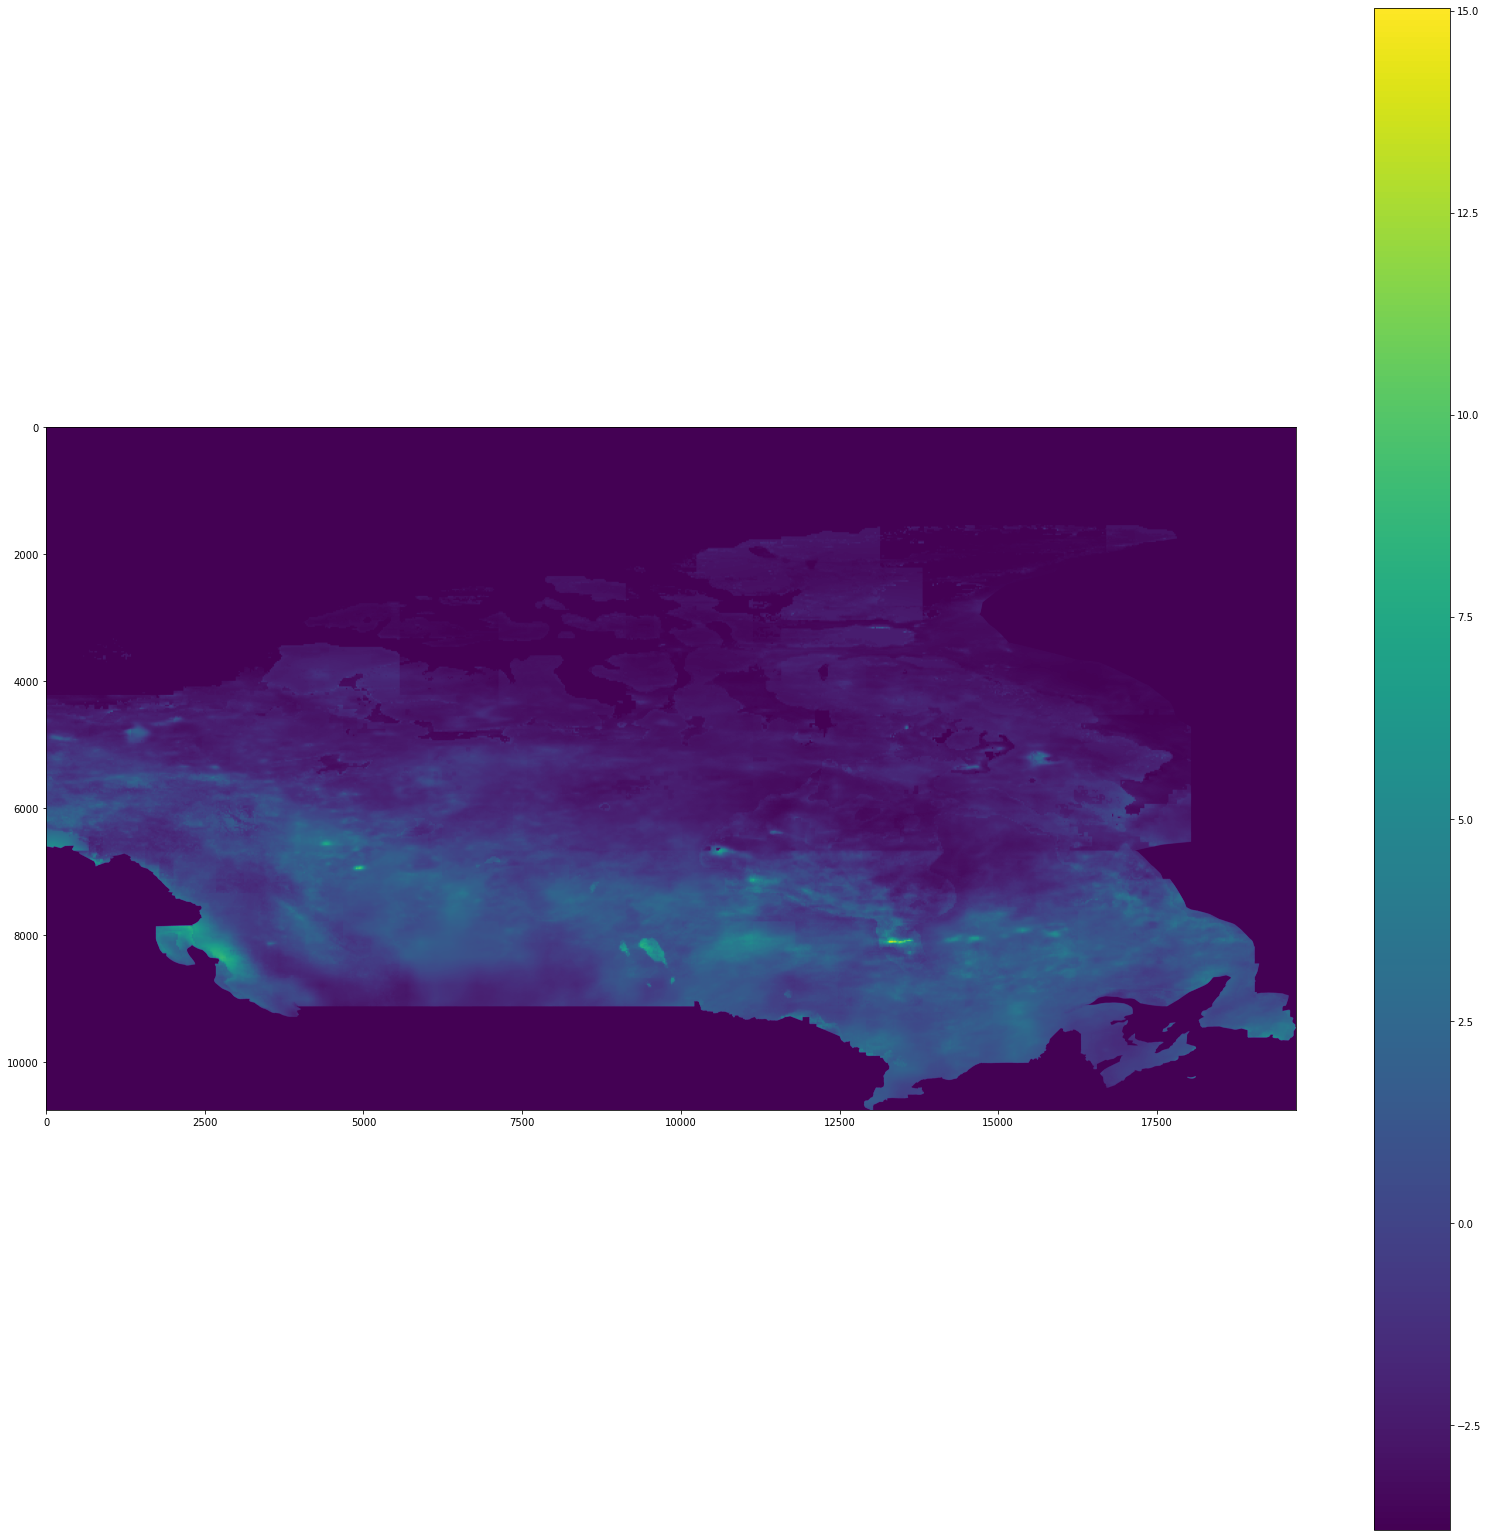

1


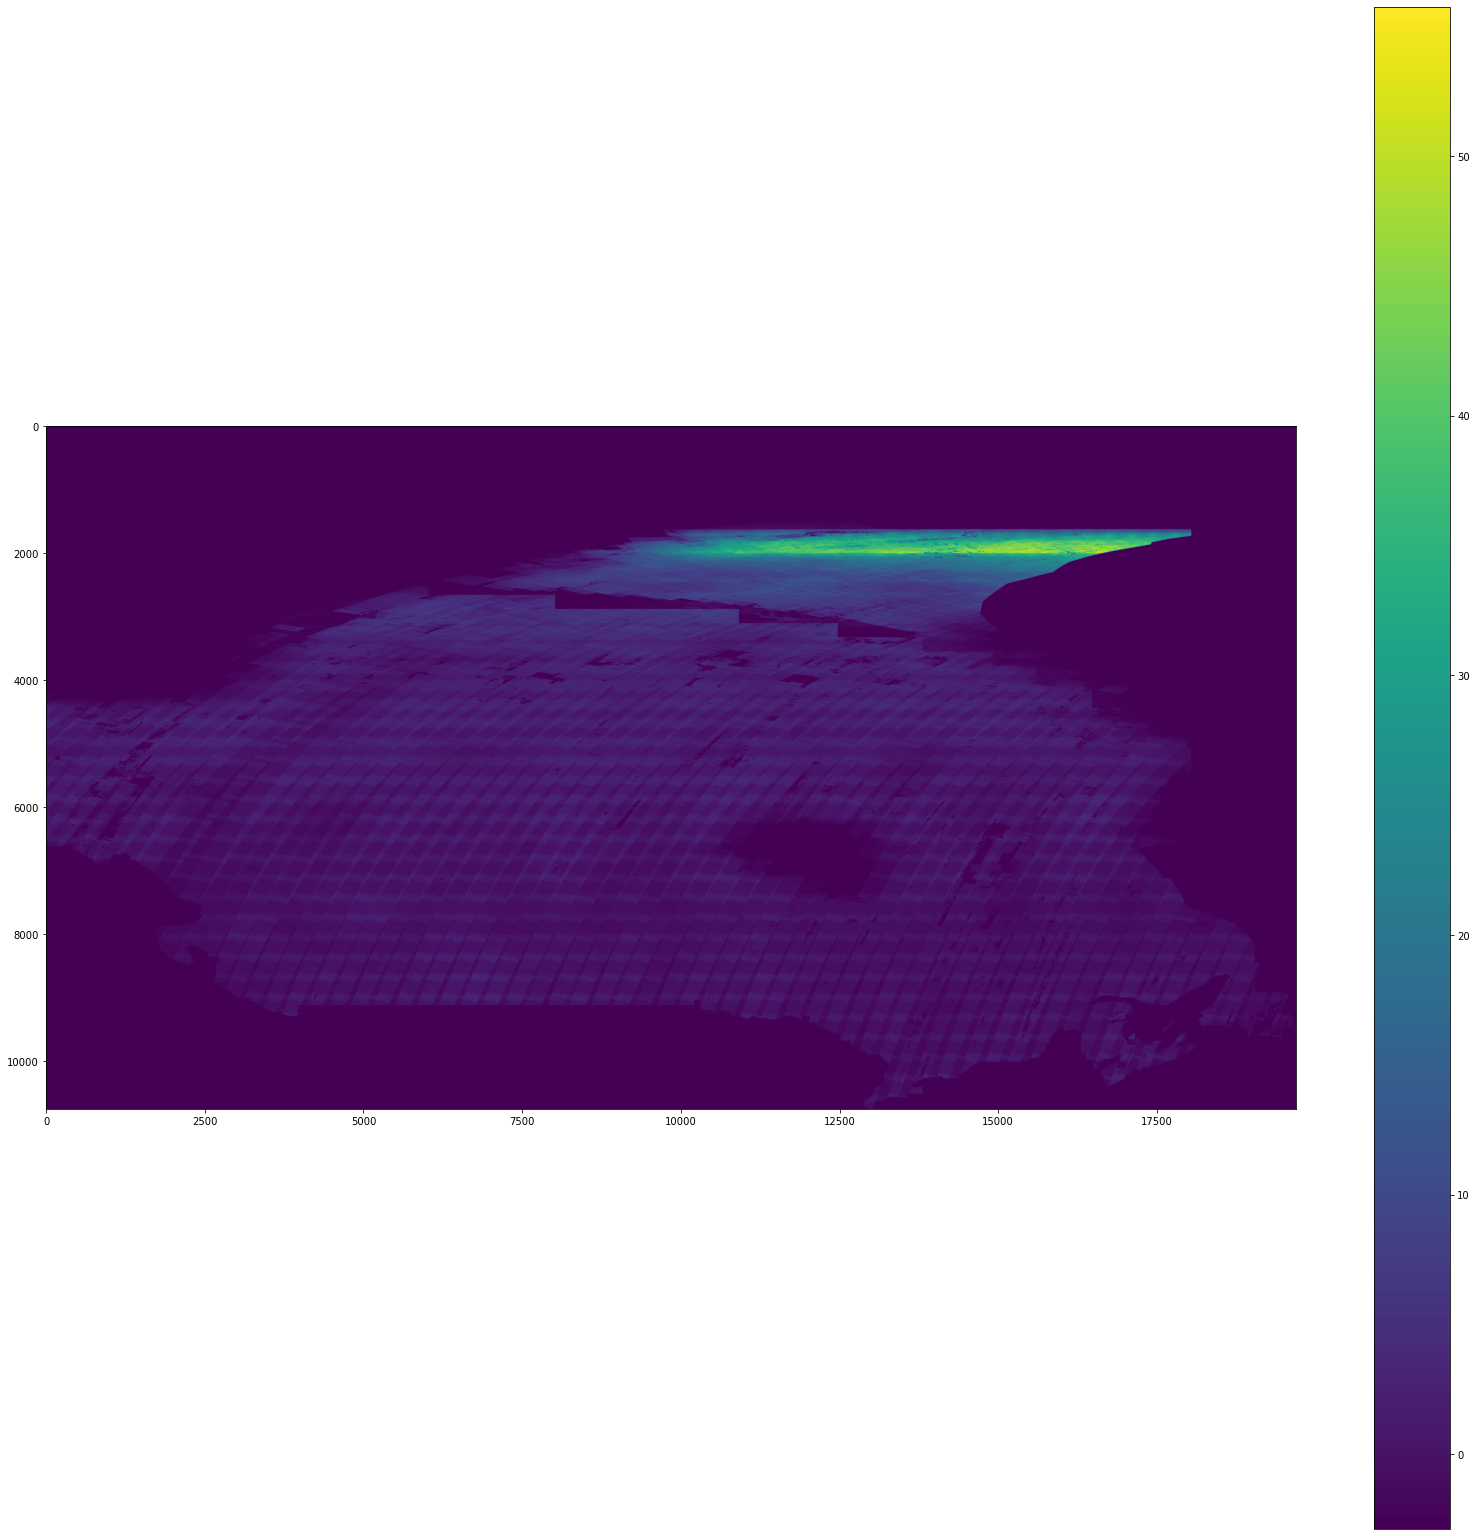

2


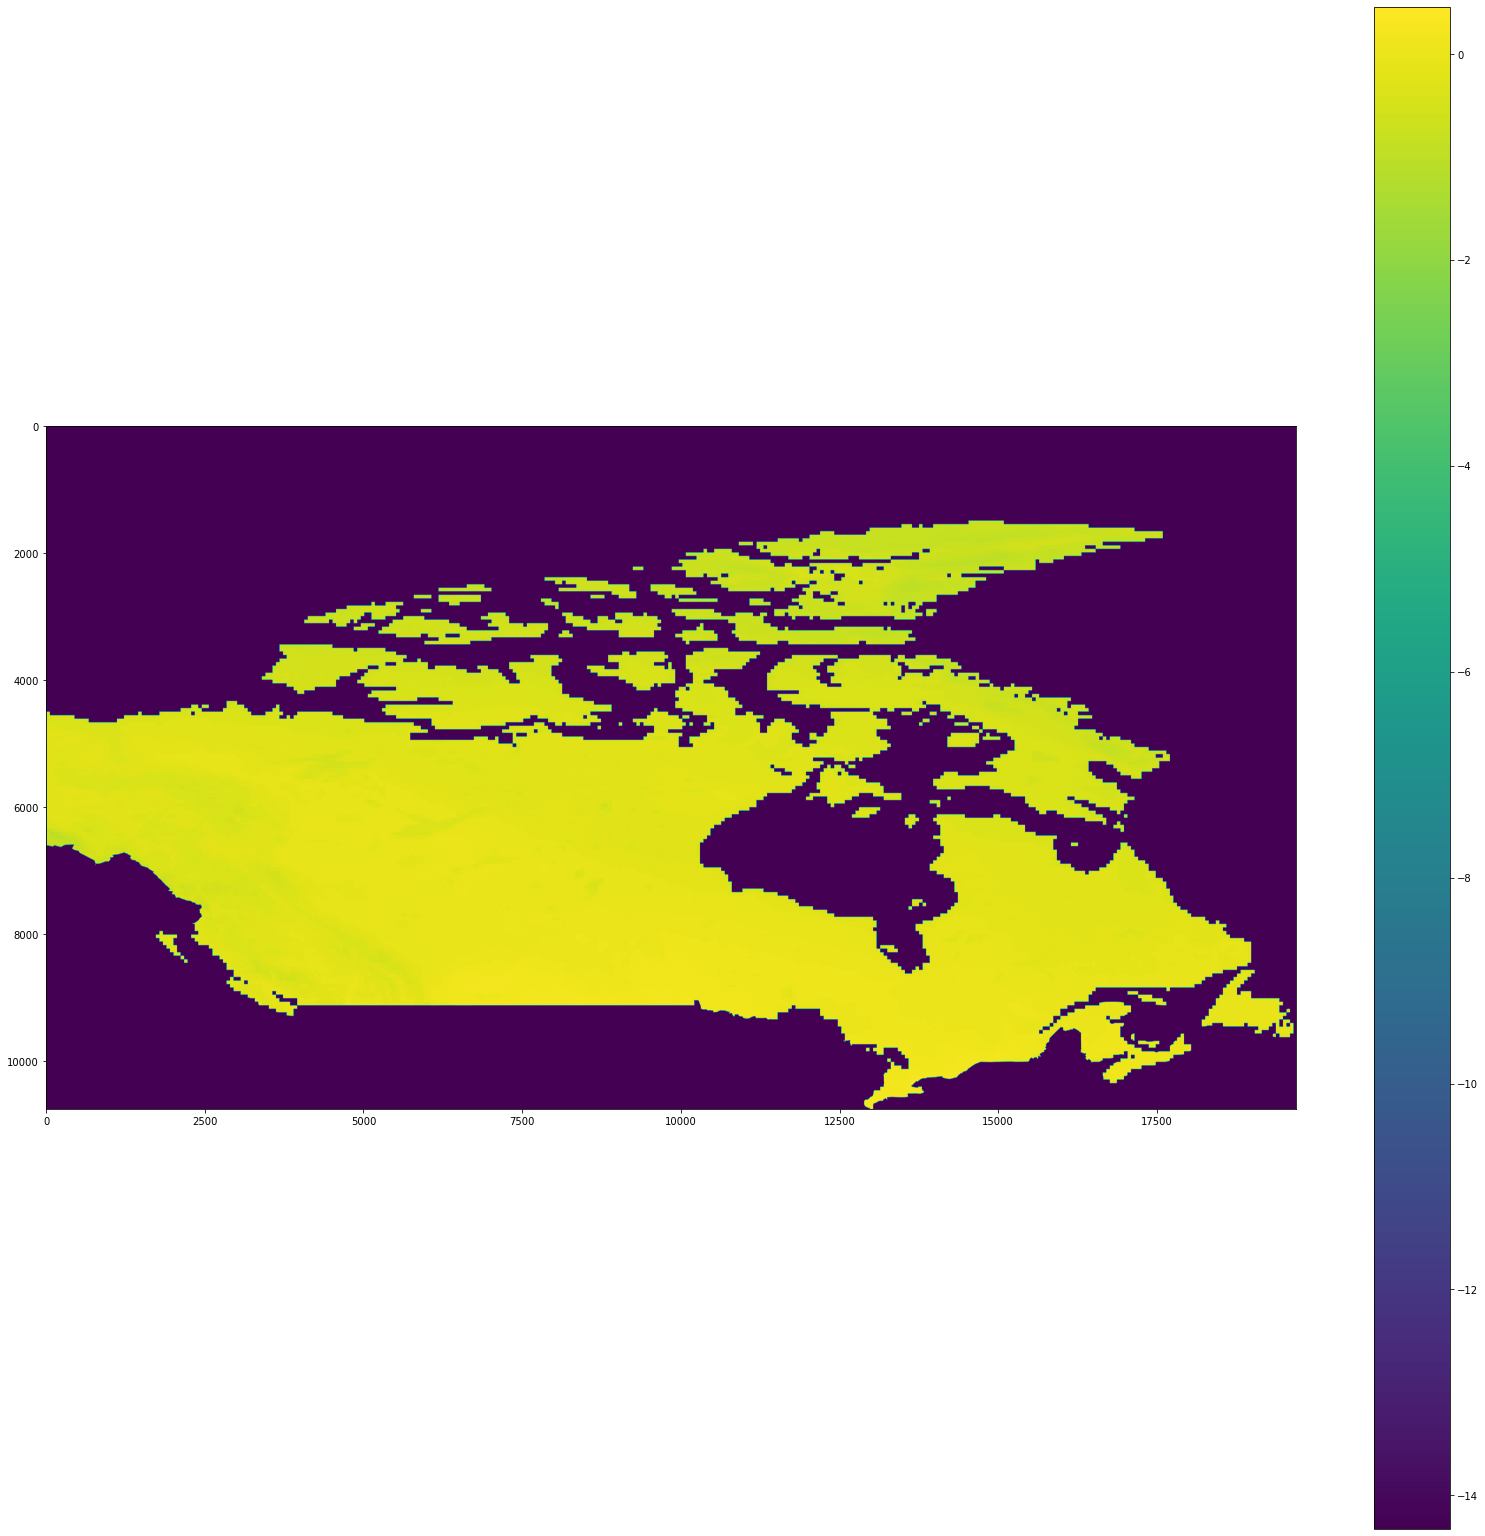

3


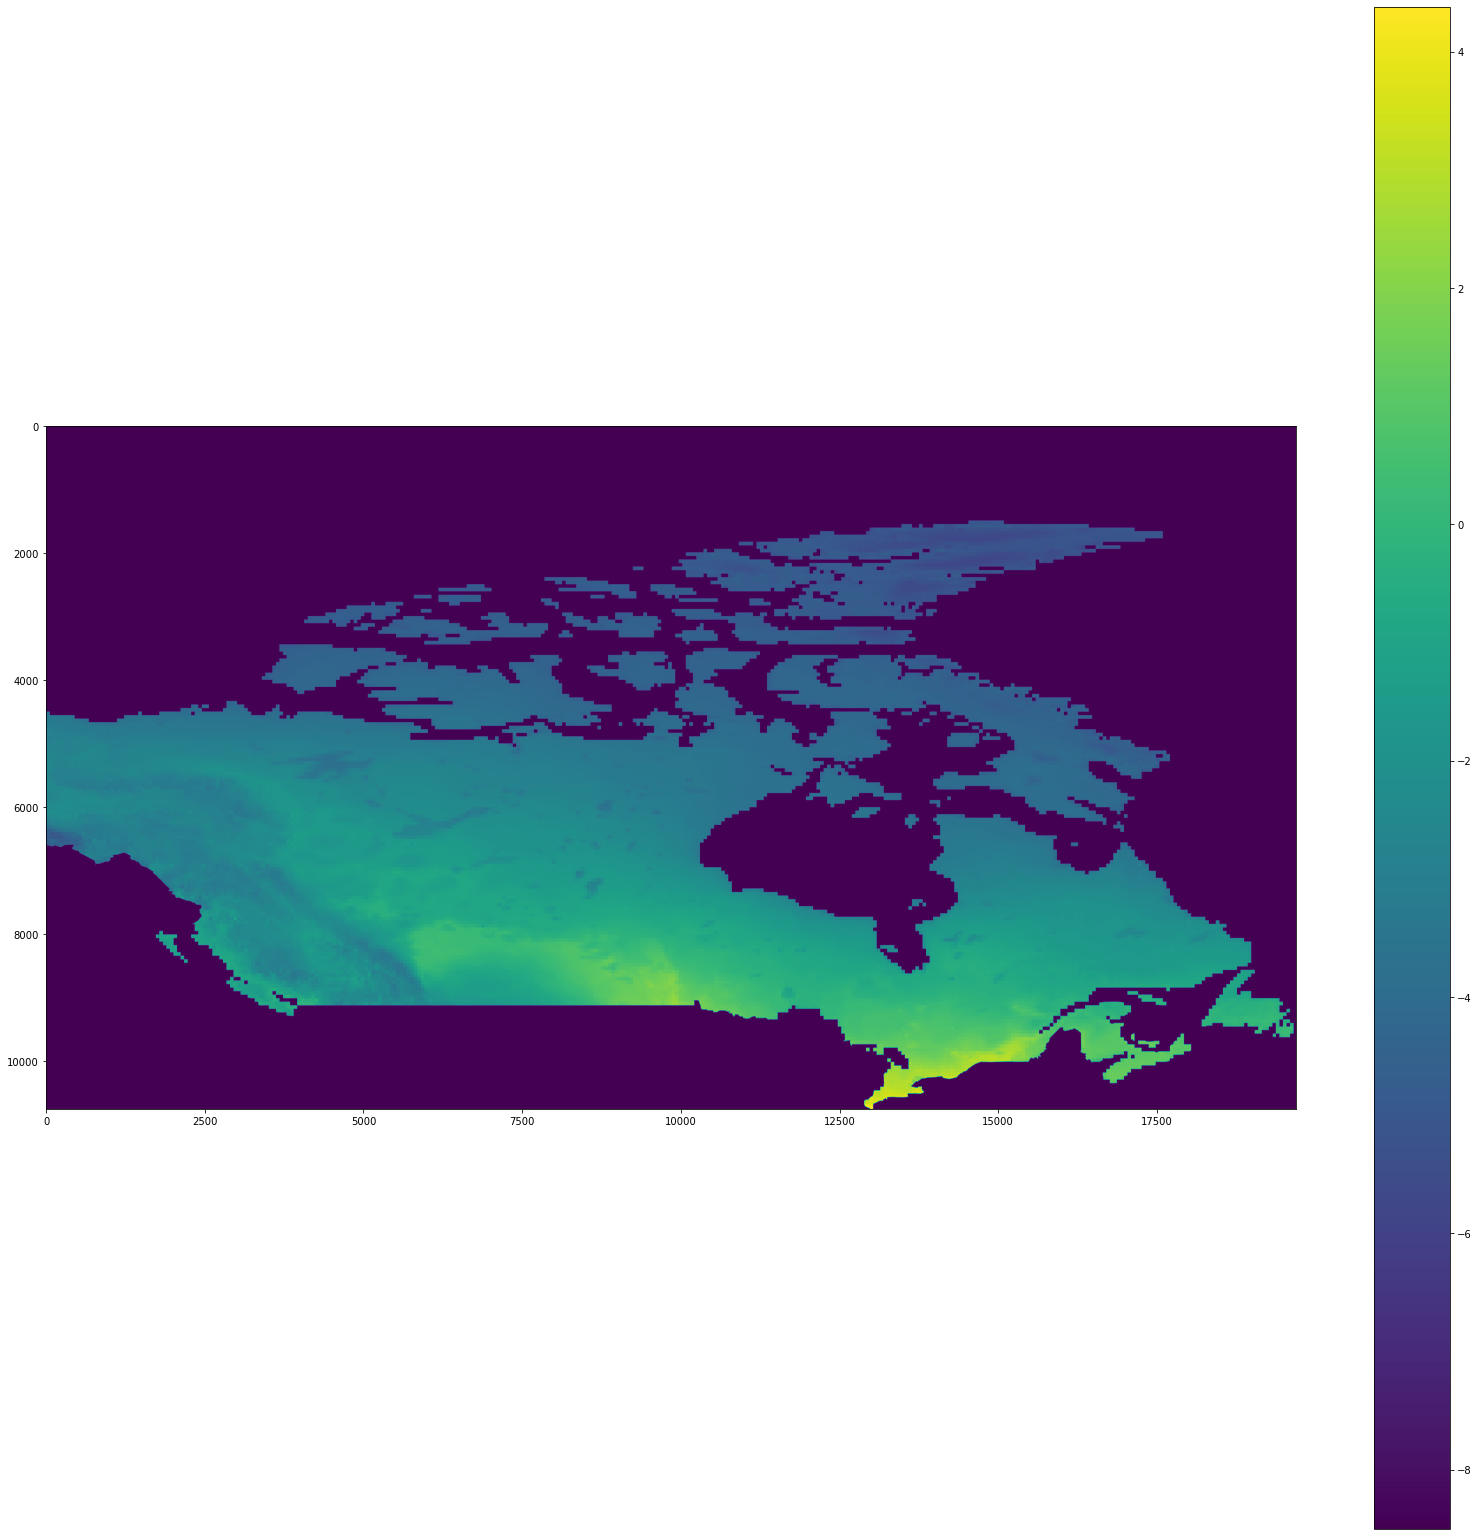

4


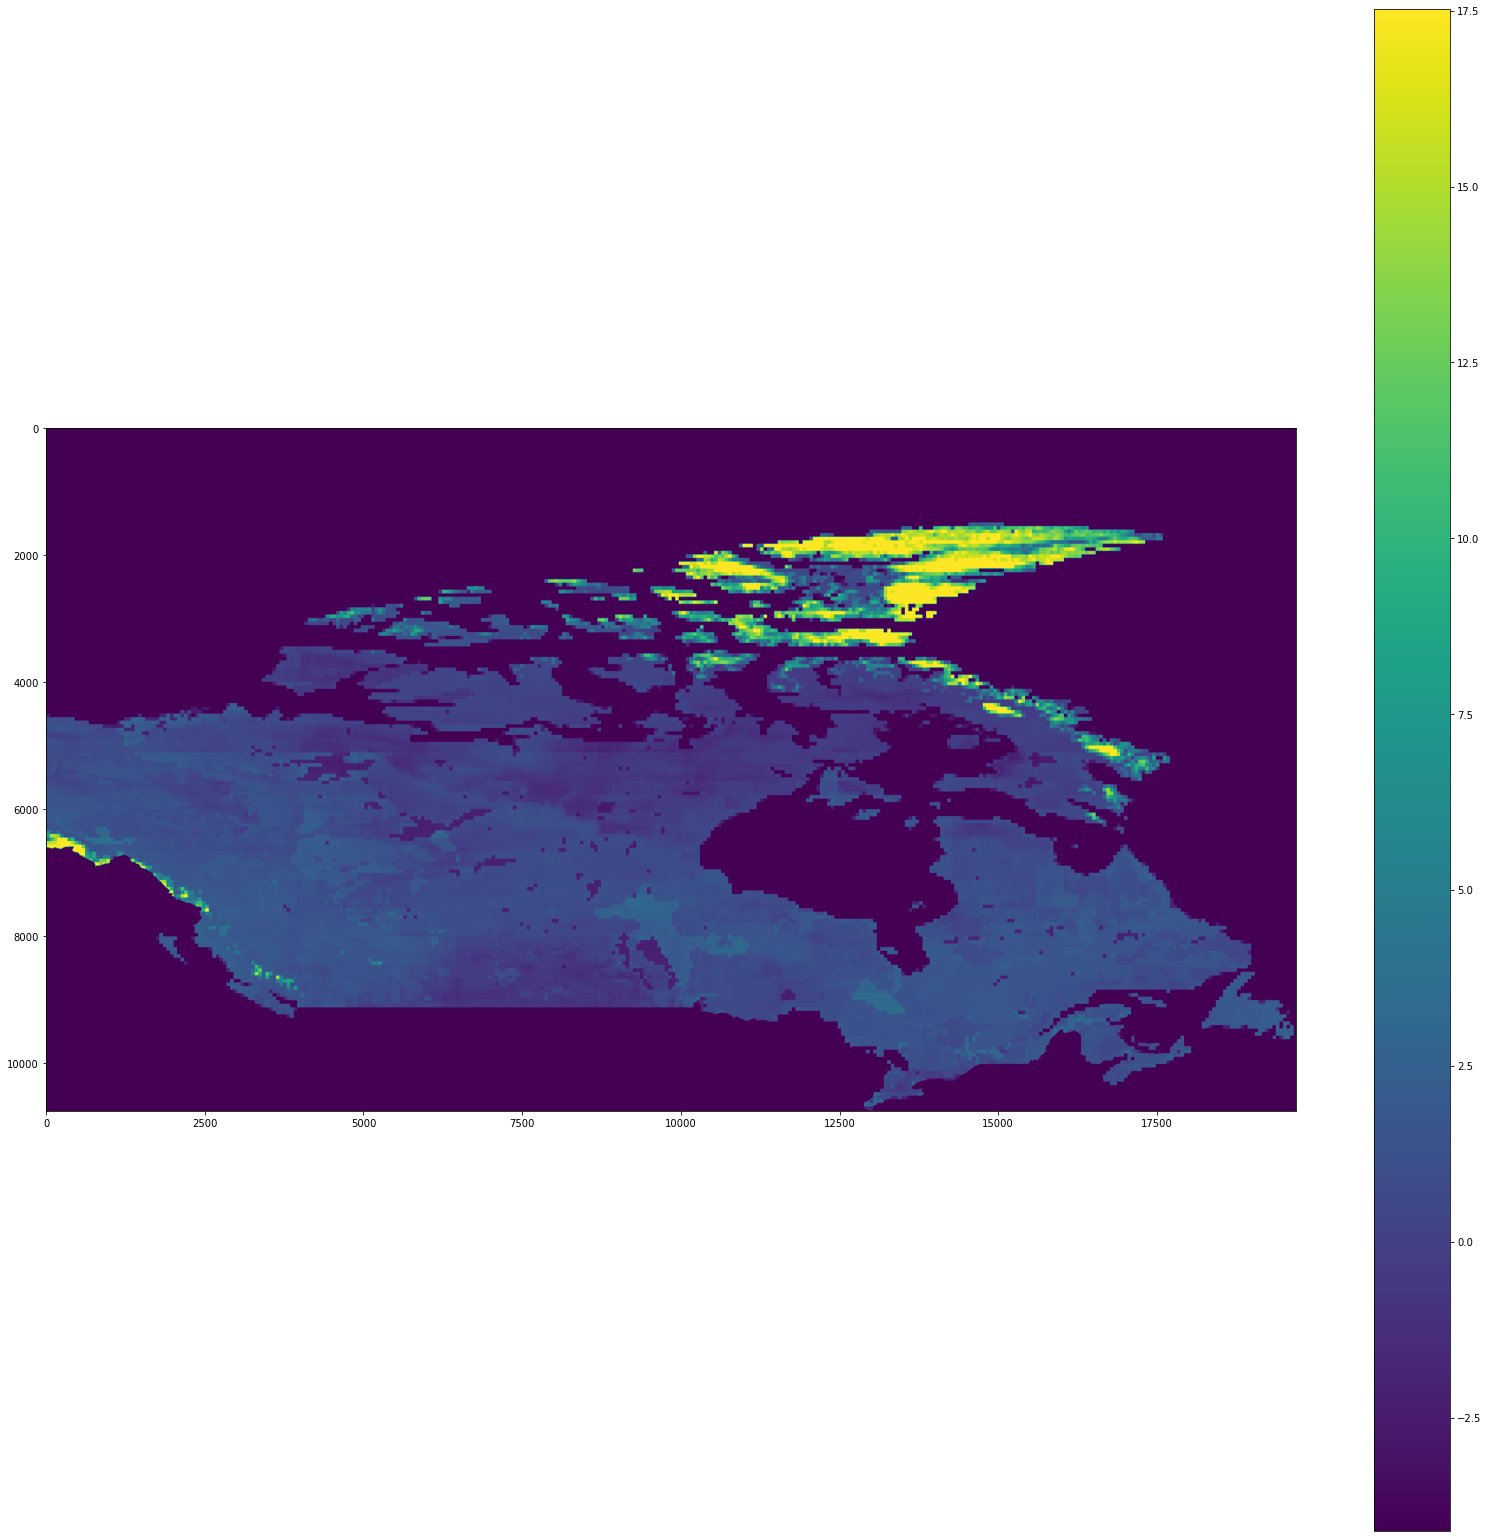

5


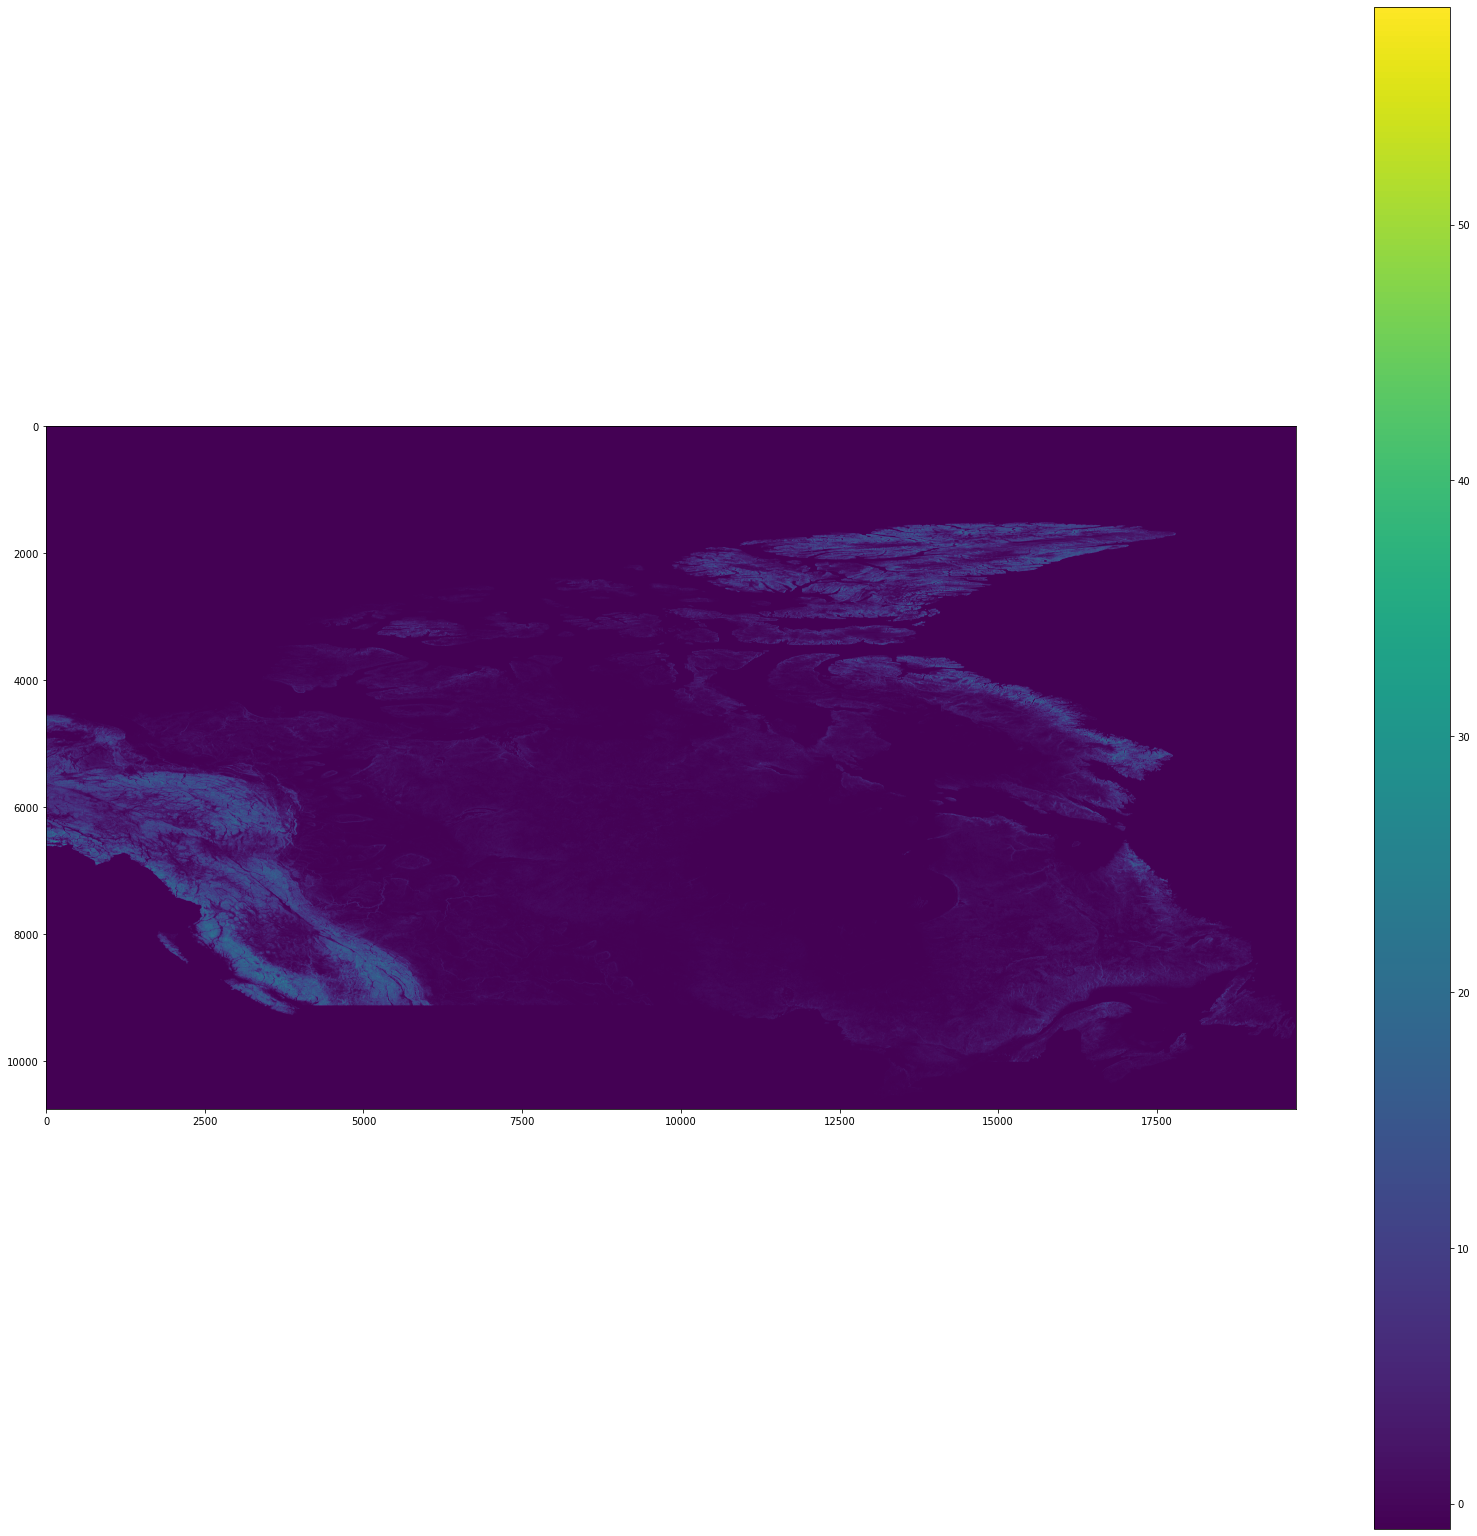

6


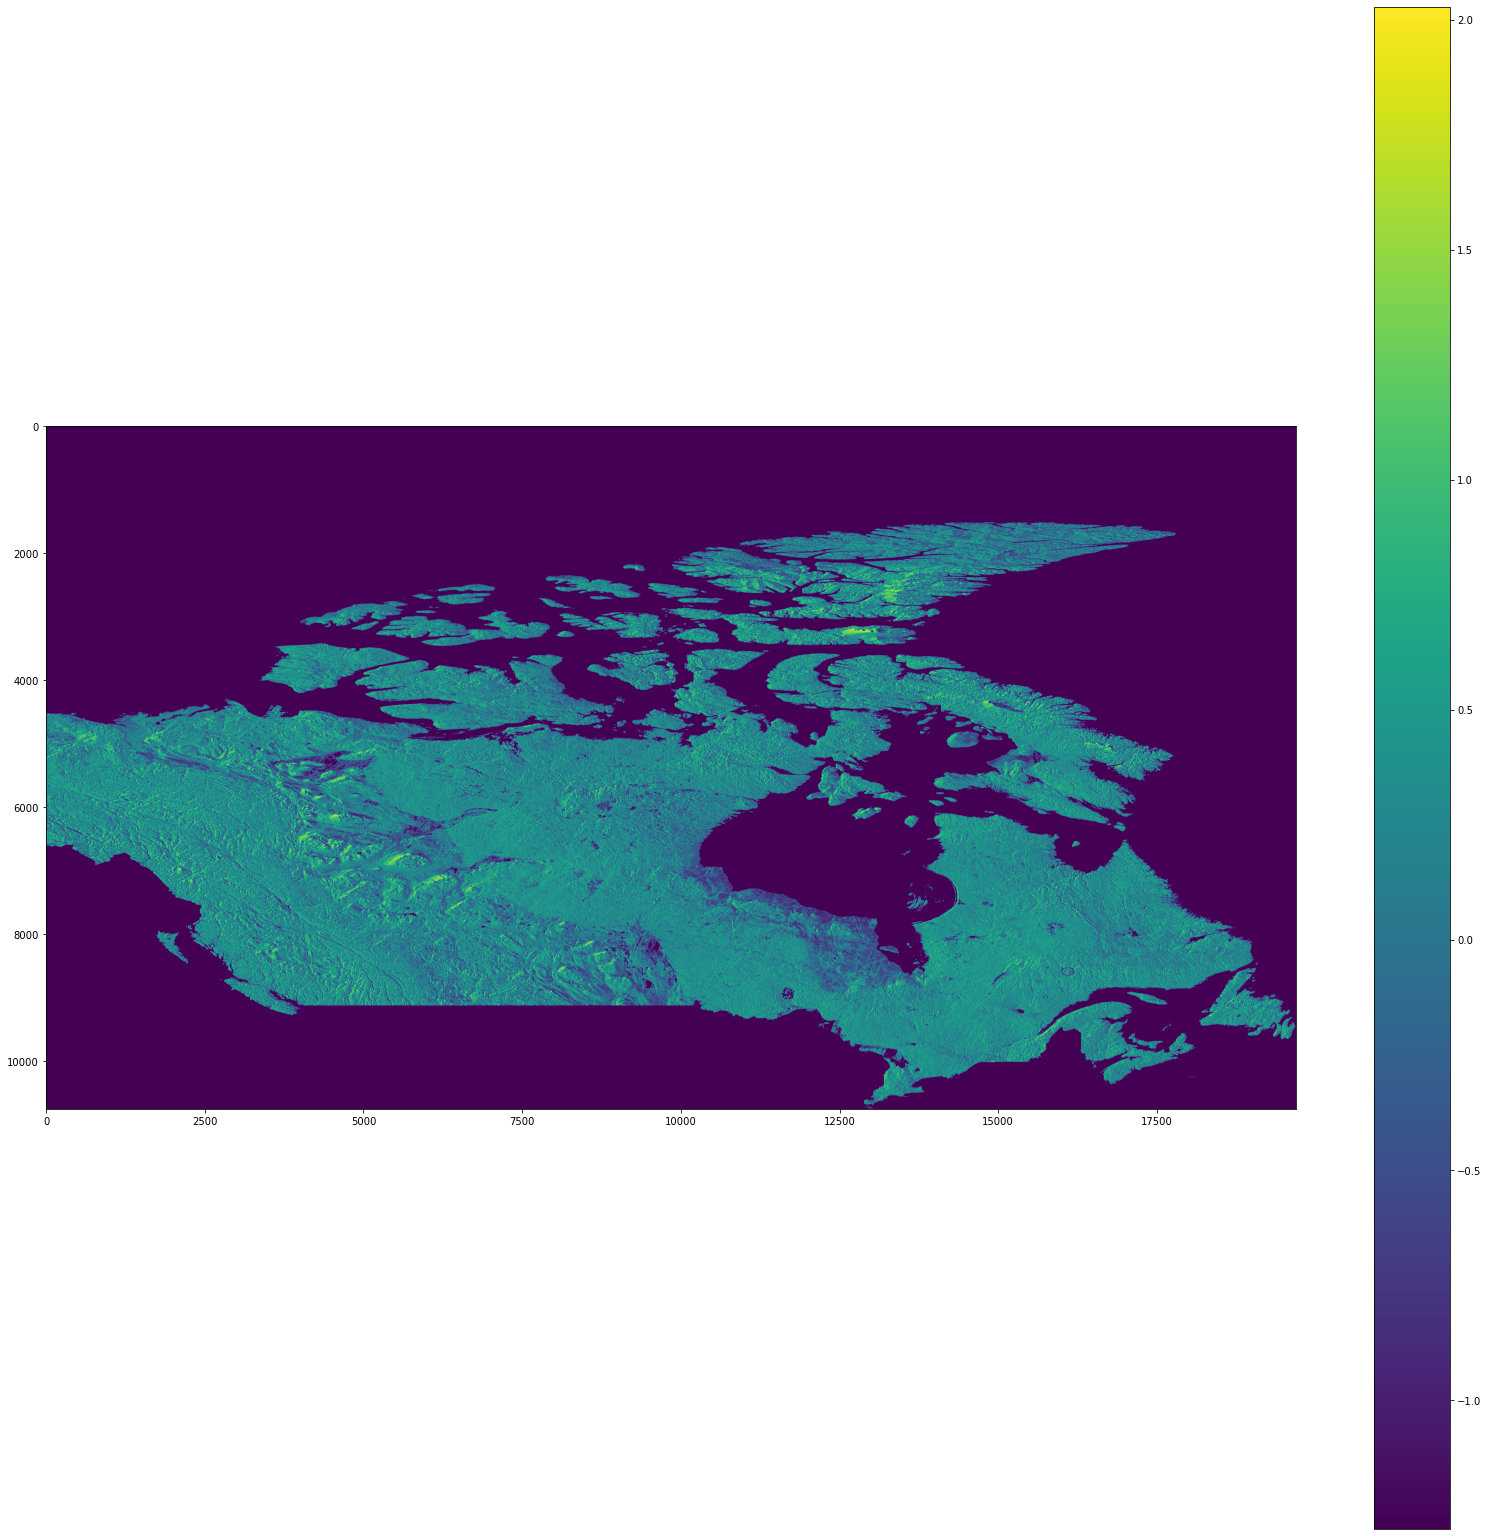

7


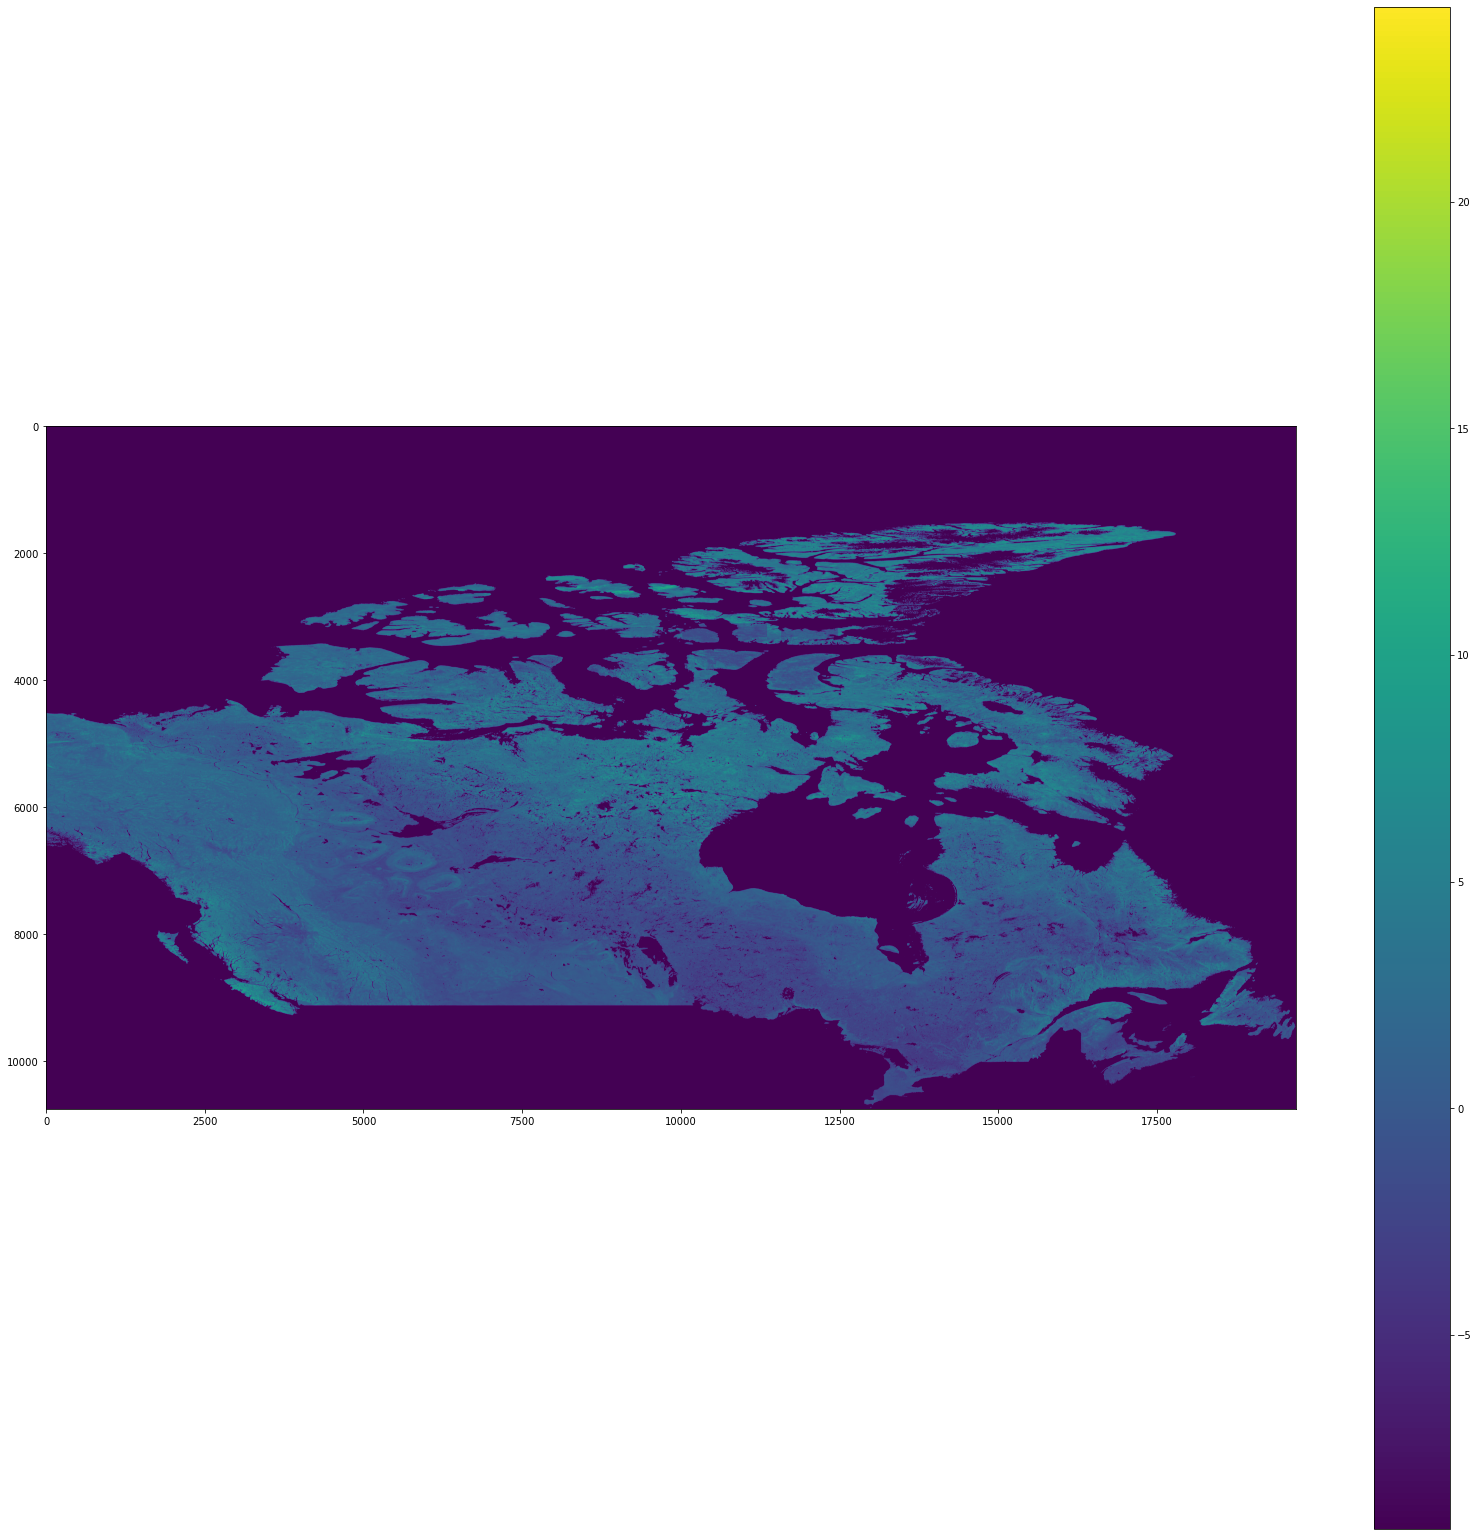

8


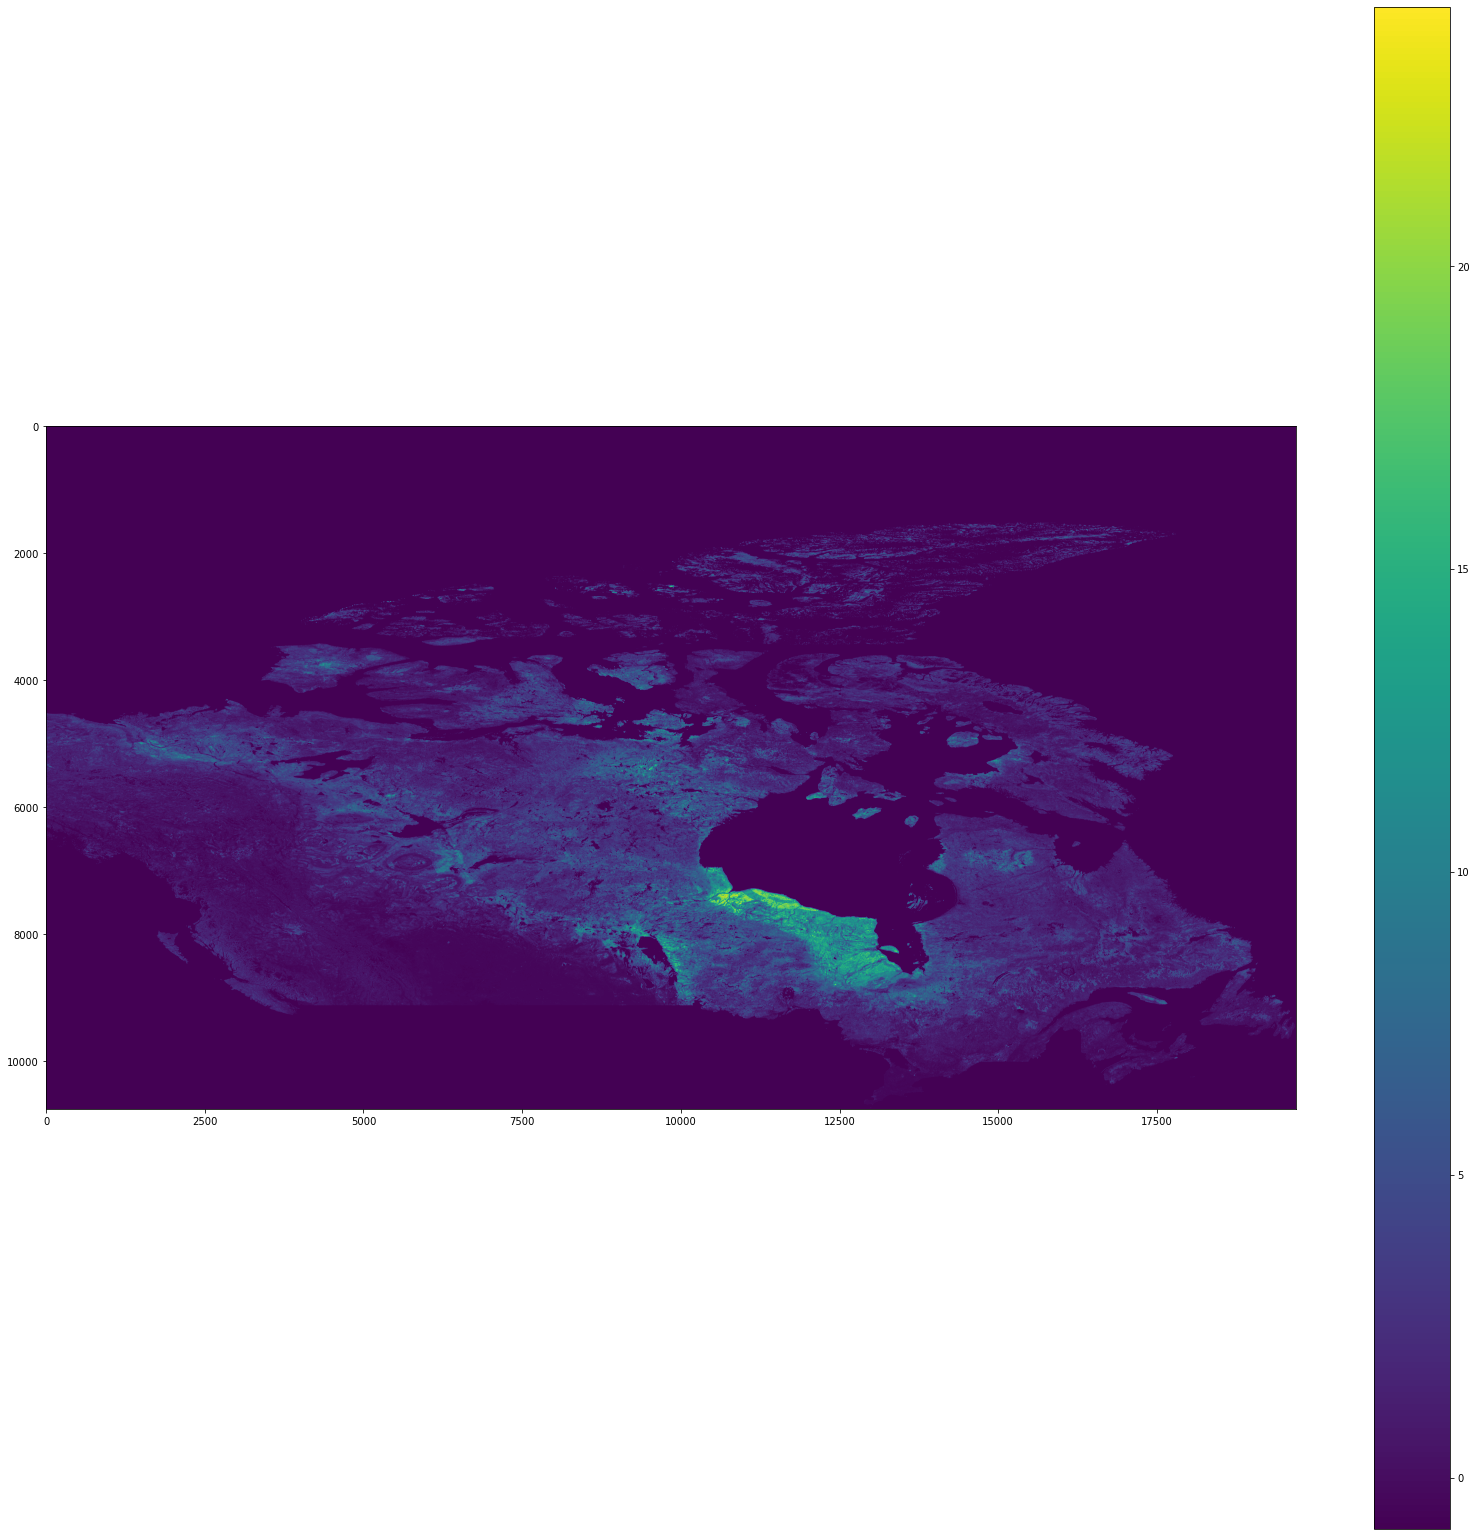

9


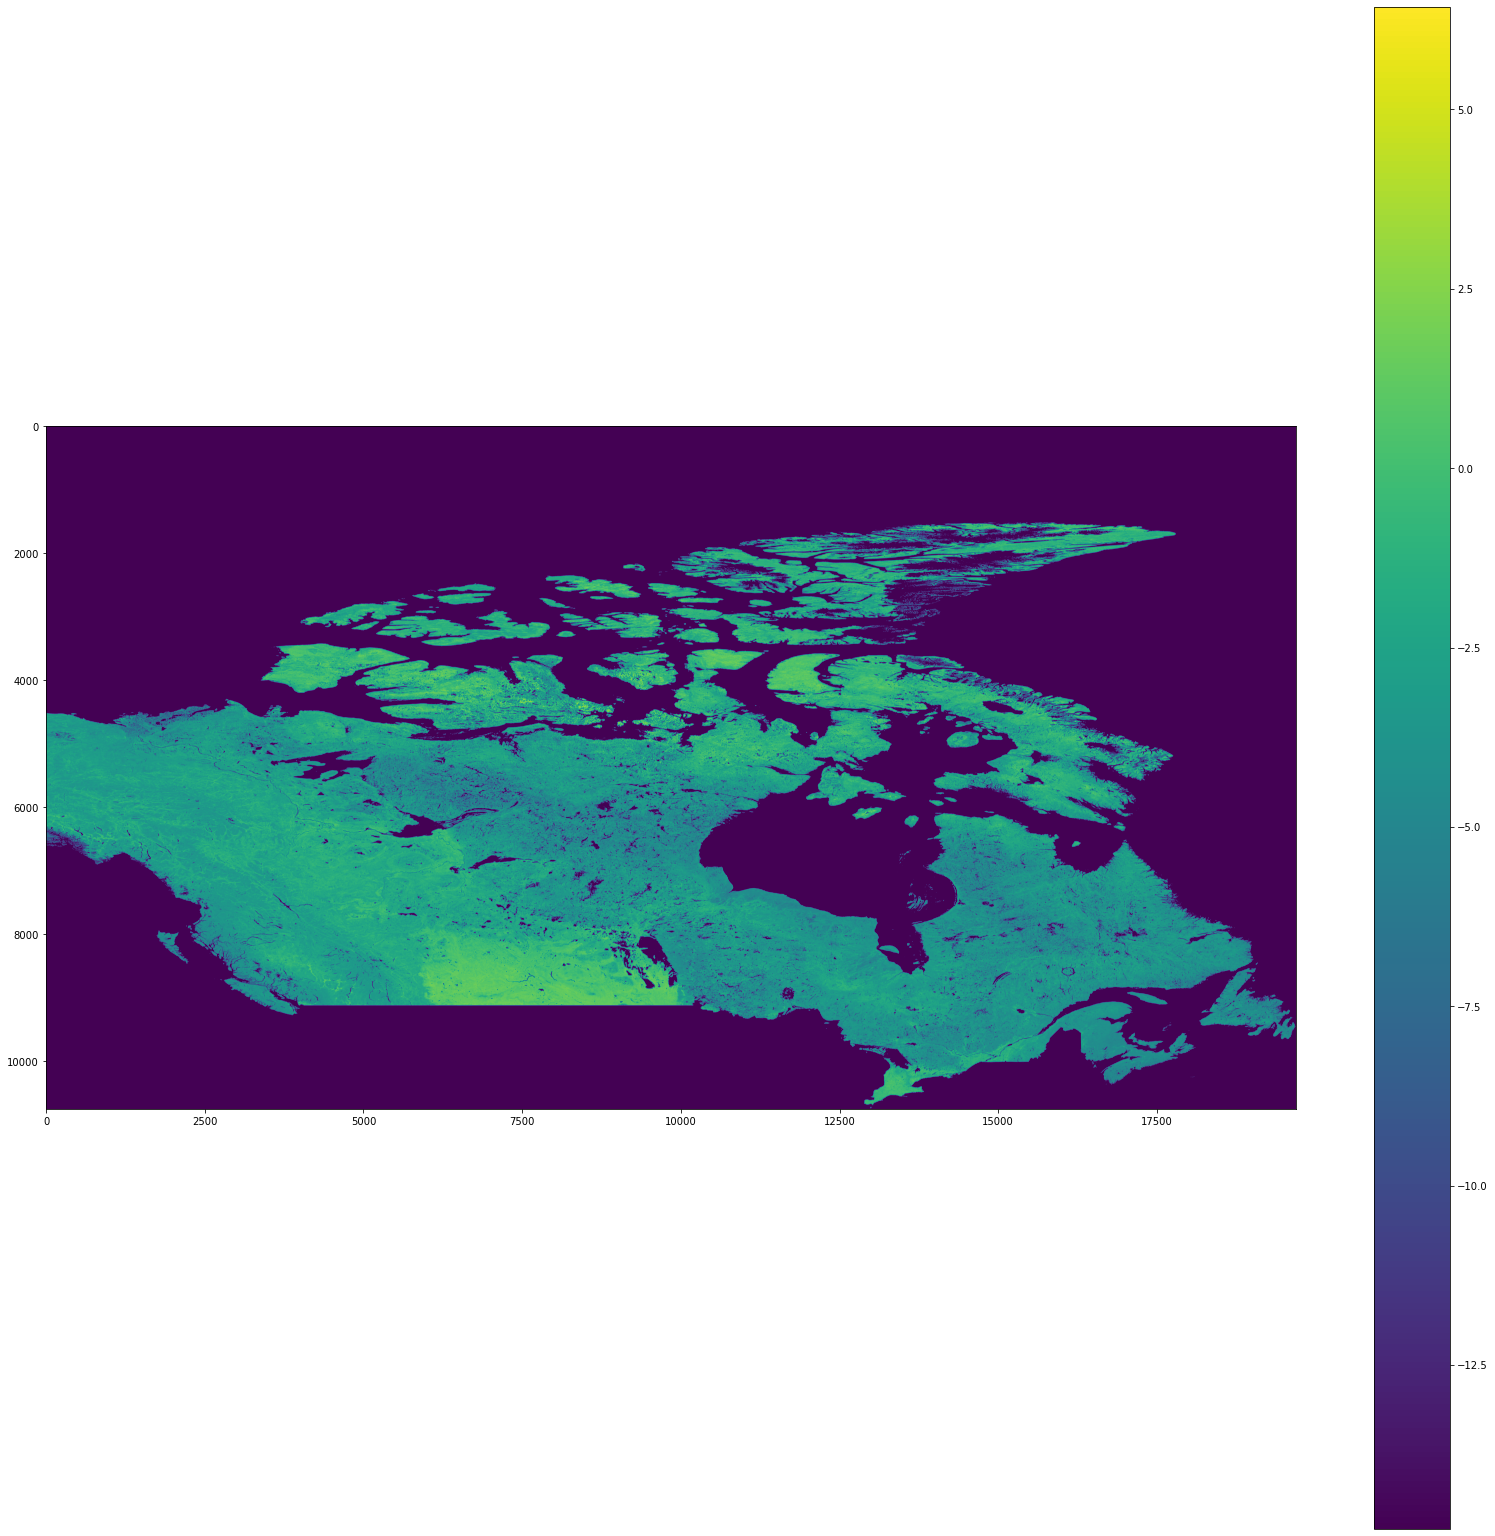

10


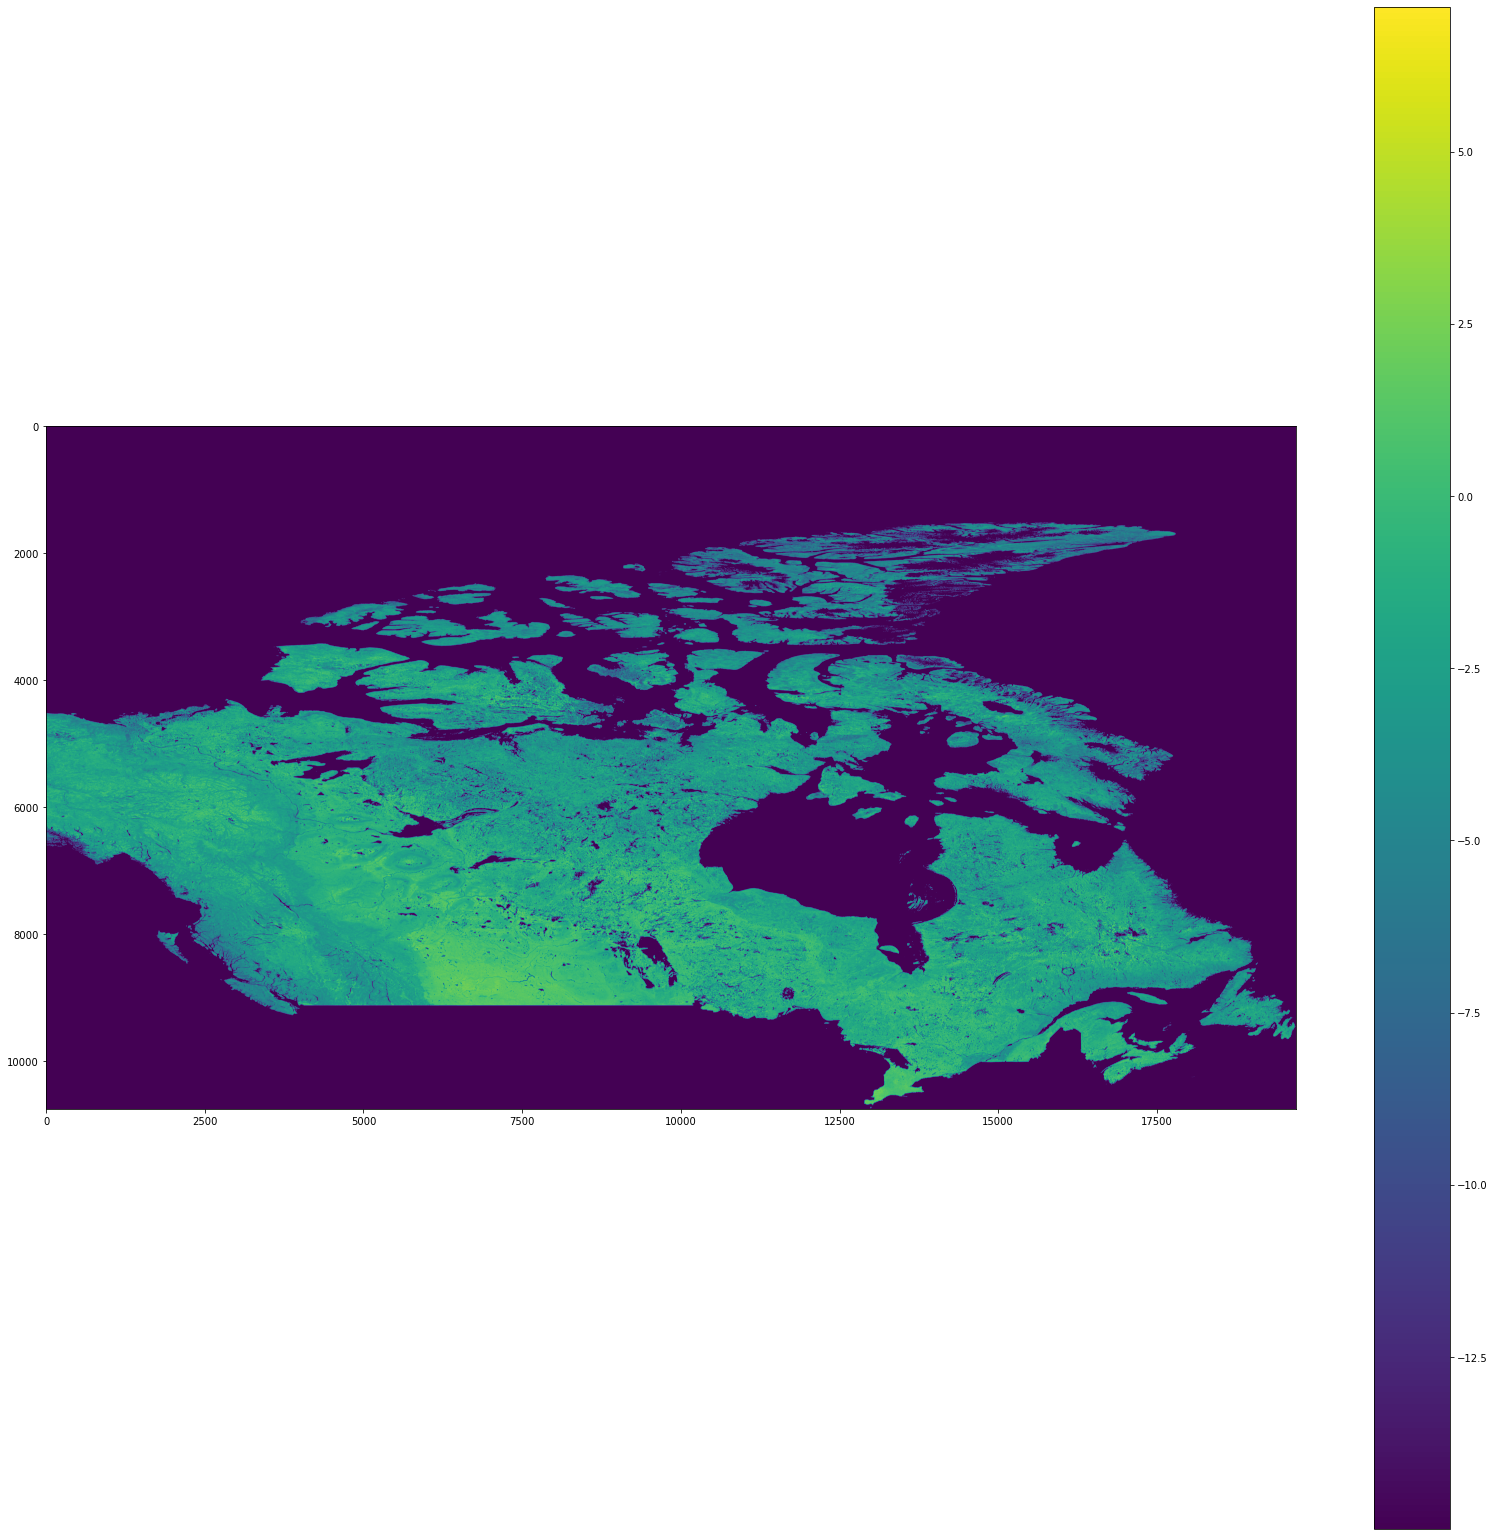

11


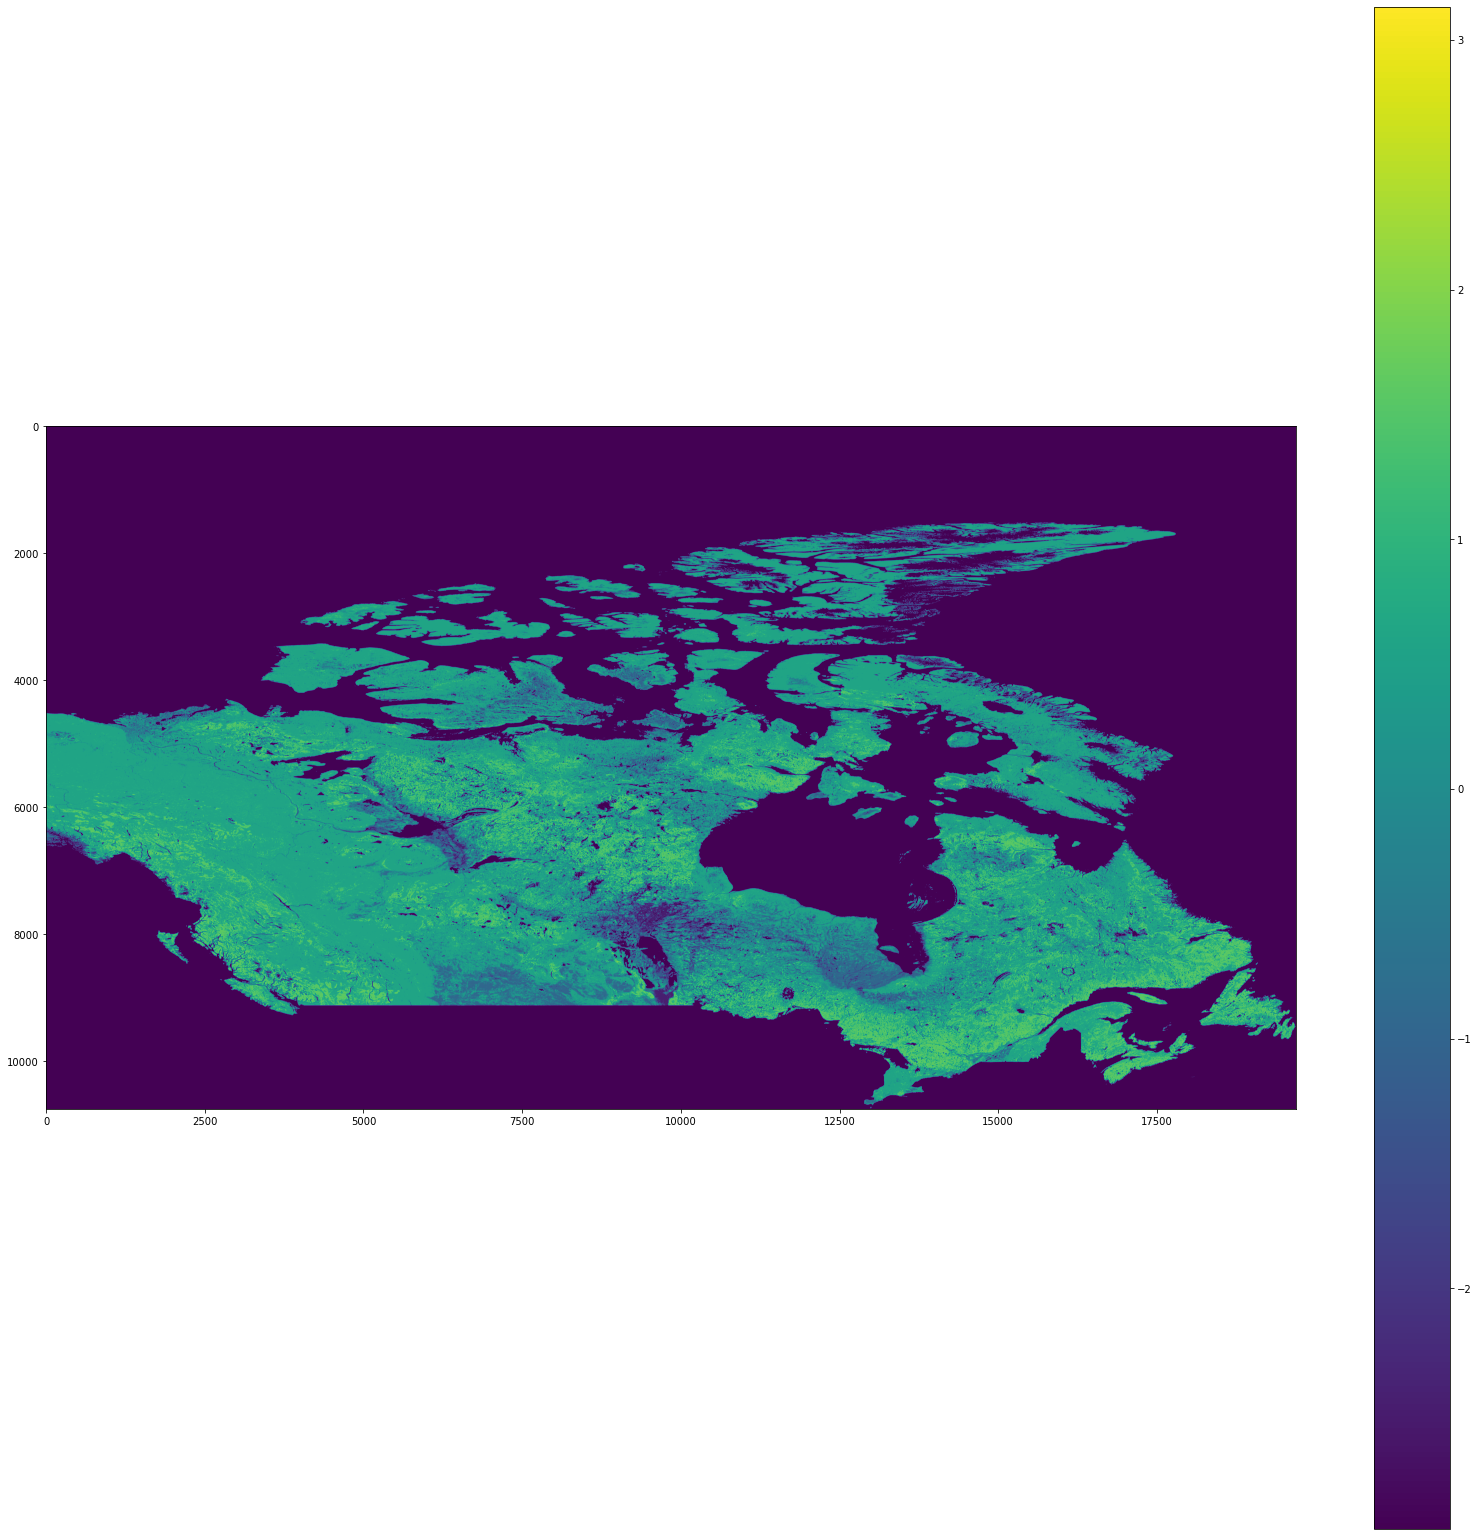

In [256]:
print(image_bands.shape)

for i in range(0, 12):
    print(i)
    plt.figure(figsize=(28, 28))
    plt.imshow(image_bands[:,:,i])
    plt.colorbar()
    plt.show()

In [ ]:
with open('Canada.pickle', 'wb') as handle:
    pickle.dump(image_bands, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('Canada_yield.pickle', 'rb') as handle:
    Canada_yield = pickle.load(handle)
    
print(Canada_yield.shape)

In [ ]:
plt.figure(figsize=(28, 28))
plt.hist(Canada_yield)
plt.show()

In [ ]:
plt.figure(figsize=(28, 28))
plt.imshow(Canada_yield)
plt.colorbar()
plt.show()

In [ ]:
with rasterio.open('./Canada_500scale/Canada_texture.tif') as src:
    ras_meta = src.profile


with rasterio.open('./Canada_yield_raster_500.tif', 'w', **ras_meta) as dst:
    dst.write(Canada_yield, indexes=1)

Upload .tif to google earth engine profile

Load Predicted yields

In [15]:
with open('y_train_predicted.pickle', 'rb') as handle:
    y_train_predicted = pickle.load(handle)

    
with open('y_val_predicted.pickle', 'rb') as handle:
    y_val_predicted = pickle.load(handle)

#### Visualize Observed Yield

In [20]:
Map = geemap.Map()

translationTable = str.maketrans("ÀàÇçÂâÄäÈèÉéÊêËÎîÏÔôÙùÛûÜüŸÿ()", "AaCcAaAaEeEeEeEIiIOoUuUuUuYy--")


years = ['2020']
regions_loop_2017_names = [name.translate(translationTable)[:50] for geometry,name in regions_loop_2017]

vis_params = {'min': 0,
              'max': 120,
              'palette': ['FCFDBF', 'FDAE78', 'EE605E', 'B63679', '711F81', '2C105C']}

for year in years:
    for i, name_val in enumerate(names_val):
        region_name_val, year_val = name_val

        if year_val == year:
            ind = regions_loop_2017_names.index(region_name_val)
            geometry = regions_loop_2017[ind][0]
            
            cyield = (y_val[i]*21.49)+78.48
            region_image = ee.Image.constant(cyield)
            region_image = region_image.clip(geometry)
                        
            Map.addLayer(region_image, vis_params, 'val'+'_'+str(i))
            
            
            
            
for year in years:      
    for i, name in enumerate(names):
        region_name_train, year_train = name

        if year_train == year:
            ind = regions_loop_2017_names.index(region_name_train)
            geometry = regions_loop_2017[ind][0]
            
            cyield = (y[i]*21.49)+78.48
            region_image = ee.Image.constant(cyield)
            region_image = region_image.clip(geometry)
                        
            Map.addLayer(region_image, vis_params, 'train'+'_'+str(i))


            
Map.add_colorbar(vis_params, label="Crop Yield (bushels per acre)", layer_name="Crop Yield Legend")    
            
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

#### Visualize Predicted Yield

In [21]:
Map = geemap.Map()

years = ['2020']
regions_loop_2017_names = [name.translate(translationTable)[:50] for geometry,name in regions_loop_2017]

vis_params = {'min': 0,
              'max': 120,
              'palette': ['FCFDBF', 'FDAE78', 'EE605E', 'B63679', '711F81', '2C105C']}

for year in years:
    for i, name_val in enumerate(names_val):
        region_name_val, year_val = name_val

        if year_val == year:
            ind = regions_loop_2017_names.index(region_name_val)
            geometry = regions_loop_2017[ind][0]
            
            cyield = (y_val_predicted[i]*21.49)+78.48
            region_image = ee.Image.constant(cyield)
            region_image = region_image.clip(geometry)
                        
            Map.addLayer(region_image, vis_params, 'val'+'_'+str(i))
            
            
            
            
for year in years:      
    for i, name in enumerate(names):
        region_name_train, year_train = name

        if year_train == year:
            ind = regions_loop_2017_names.index(region_name_train)
            geometry = regions_loop_2017[ind][0]
            
            cyield = (y_train_predicted[i]*21.49)+78.48
            region_image = ee.Image.constant(cyield)
            region_image = region_image.clip(geometry)
                        
            Map.addLayer(region_image, vis_params, 'train'+'_'+str(i))


            
Map.add_colorbar(vis_params, label="Crop Yield (bushels per acre)", layer_name="Crop Yield Legend")    
            
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

### Suitability Map

In [46]:
Map = geemap.Map()

# Add pH data to map
yieldd = ee.Image("users/amanjotbhullar/Canada_yield_raster_500")
pH_visualization = {
  'bands': ['b1'],
  'min': -20,
  'max': 20,
  'palette': [
    "FF0000","FF1C00","FF3900","FF5500","FF7100","FF8E00",
    "FFAA00","FFC600","FFE200","FFFF00","E3FF00","C7FF00",
    "AAFF00","8EFF00","72FF00","55FF00","39FF00","1DFF00",
    "01FF00","00FF1C","00FF38","00FF54","00FF71","00FF8D",
    "00FFA9","00FFC6","00FFE2","00FFFE","00E3FF","00C7FF",
    "00ABFF","008FFF","0072FF","0056FF","003AFF","001DFF",
    "0001FF","1B00FF","3800FF","5400FF",
  ]
}
Map.addLayer(yieldd, pH_visualization, "yieldd", opacity=0.5)


# # Add pH data to map
# pH = ee.Image("OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02")
# pH_visualization = {
#   'bands': ['b30'],
#   'min': 42,
#   'max': 110,
#   'palette': [
#     "FF0000","FF1C00","FF3900","FF5500","FF7100","FF8E00",
#     "FFAA00","FFC600","FFE200","FFFF00","E3FF00","C7FF00",
#     "AAFF00","8EFF00","72FF00","55FF00","39FF00","1DFF00",
#     "01FF00","00FF1C","00FF38","00FF54","00FF71","00FF8D",
#     "00FFA9","00FFC6","00FFE2","00FFFE","00E3FF","00C7FF",
#     "00ABFF","008FFF","0072FF","0056FF","003AFF","001DFF",
#     "0001FF","1B00FF","3800FF","5400FF",
#   ]
# }
# Map.addLayer(pH, pH_visualization, "ph", opacity=0.5)

Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

## Increasing dataset for suitability analysis

Below is a map of all areas where crop 1 and crop 2 were grown from 2013-2020.
<img src="../Crop_Yield/crop1crop2.png" width="500" height="500">
* Suppose crop 1 is vastly grown, and crop 2 is grown on an area that is a small subset of where crop 1 is grown.

<img src="../Crop_Yield/dandi.jpg" width="400" height="400">

* Though it's possible, it doesn't neccessarily mean that crop 2 can grow anywhere crop 1 can grow.

* However, if 
$$ \frac{\text{Overlapping area of crop 1 and crop 2}}{\text{Area of crop 2}}$$
is high than there's reason to believe that crop 1 can grow anywhere crop 2 can grow. For the above figure, the metric is equal to 1. Let's also assume that crop 1 can grow just as well as crop 2 in the regions where crop 2 is planted.

* In turn, the relevant soil-climate-landscape variables can be mapped to the standardized crop yields for crop 1 and crop 2.

* The model tells you how suitable an area is for growing crop 1.


## Everywhere the crop has been grown from 2013-2020

### Barley
<img src="../Crop_Yield/barley.PNG" >

### Lentils
<img src="../Crop_Yield/lentils.PNG"  >

### Canola
<img src="../Crop_Yield/canola.PNG"  >

### Spring Wheat
<img src="../Crop_Yield/spring_wheat.PNG"  >

### Oats
<img src="../Crop_Yield/oats.PNG"  >

### Corn
<img src="../Crop_Yield/corn.PNG"  >

### Soybean
<img src="../Crop_Yield/soybean.PNG"  >

### Flaxseed
<img src="../Crop_Yield/flaxseed.PNG"  >

### Peas
<img src="../Crop_Yield/peas.PNG"  >

### Rye
<img src="../Crop_Yield/Rye.PNG"  >

### Triticale
<img src="../Crop_Yield/triticale.PNG"  >

### Canaryseed
<img src="../Crop_Yield/canaryseed.PNG"  >

### Chickpeas
<img src="../Crop_Yield/chickpeas.PNG"  >

### Mustard
<img src="../Crop_Yield/mustard.PNG"  >

### Sunflower
<img src="../Crop_Yield/sunflower.PNG"  >

Better Version

In [ ]:
# crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Wheat, all', 'Canola', 
#               'Flaxseed', 'Peas, dry', 'Rye, fall remaining', 'Wheat, durum', 
#               'Wheat, spring', 'Wheat, winter remaining', 'Rye, all', 'Rye, spring',
#               'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 'Mustard seed', 
#               'Sunflower seed']

# crops = [133, 147, 136, 158, 0, 153, 154, 162, 
#          0, 0, 146, 145, 137, 0, 139, 196, 163, 174, 155, 157]



#New Crops list
crop_names = ['Barley', 'Corn for grain', 'Oats', 'Soybeans', 'Canola', 'Flaxseed', 'Peas, dry', 
              'Wheat, spring', 'Rye, all', 'Triticale', 'Canary seed', 'Chick peas', 'Lentils', 
              'Mustard seed', 'Sunflower seed']

crops = [133, 147, 136, 158, 153, 154, 162,
         146, 137, 139, 196, 163, 174, 
         155, 157]



years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']

crop_images = []
for i, crop in enumerate(crops):

    year='2013'
    crop_all_years = ee.ImageCollection('AAFC/ACI').filter(ee.Filter.date(year+'-01-01', year+'-12-31')).first().eq(crop)

    #crop_all_years = ee.Image()
    for year in years:

        # AAFC for the specified date
        if year != '2020':
            AAFC = ee.ImageCollection('AAFC/ACI')
            AAFC = AAFC.filter(ee.Filter.date(year+'-01-01', year+'-12-31')).first()
        if year == '2020':
            AAFC = ee.Image('users/amanjotbhullar/aafc_2020')

        # Mask out everything but crop i
        mask_crop = AAFC.eq(crop) 

        crop_all_years = crop_all_years.add(mask_crop)
        
    # normalize image so 0 and 1 where crop grown
    crop_all_years = crop_all_years.divide(crop_all_years)
        
    crop_images.append((crop_all_years, crop_names[i]))
        

    

### Normalize by area of crop 1 and 2 union

In [ ]:
# scale=1000

# values = []
# for crop_image1, name1 in crop_images:
#     crop_image11 = crop_image1.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)
    
#     for crop_image2, name2 in crop_images:
#         crop_image22 = crop_image2.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)

        
#         overlap = crop_image1.updateMask(crop_image2)
#         overlap_count = overlap.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)
# #         print(overlap_count.getInfo())
#         overlap_percentage = overlap_count.getInfo()['landcover']/(crop_image11.getInfo()['landcover']+
#                                                                    crop_image22.getInfo()['landcover']-
#                                                                    overlap_count.getInfo()['landcover'])
#         print(overlap_count.getInfo()['landcover'], (crop_image11.getInfo()['landcover']+
#                                                                    crop_image22.getInfo()['landcover']-
#                                                                    overlap_count.getInfo()['landcover']), crop_image22.getInfo()['landcover'], crop_image11.getInfo()['landcover'])

#         value = (overlap_percentage, name1, name2)
#         values.append(value)
#         print(value)

In [ ]:
# # Import Dataset
# import seaborn as sns
 
# # Create dataframe from values to be used to make correllogram
# crop_overlap = pd.DataFrame(columns=crop_names, index=crop_names)
# for value in values:
#     crop_overlap[value[1]][value[2]] = round(value[0], 2)

        
    

# # Plot
# plt.figure(figsize=(12,10), dpi= 80)
# sns.heatmap(crop_overlap.astype(float), 
#             xticklabels=crop_overlap.columns, 
#             yticklabels=crop_overlap.columns, 
#             cmap='RdYlGn', center=0, annot=True)

# # Decorations
# plt.title('Overlap of areas where crops are grown from 2013-2020', fontsize=22)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()


### Normalize by area of single crop instead of Union

In [ ]:
scale=1000

values_min = []
for crop_image1, name1 in crop_images:
    crop_image11 = crop_image1.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)
    
    for crop_image2, name2 in crop_images:
        crop_image22 = crop_image2.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)

        
        overlap = crop_image1.updateMask(crop_image2)
        overlap_count = overlap.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)
        overlap_percentage = overlap_count.getInfo()['landcover']/crop_image11.getInfo()['landcover']
       
        value = (overlap_percentage, name1, name2)
        values_min.append(value)
        print(value)

In [ ]:
# Import Dataset
 
# Create dataframe from values to be used to make correllogram
crop_overlap = pd.DataFrame(columns=crop_names, index=crop_names)
for value in values_min:
    crop_overlap[value[1]][value[2]] = round(value[0], 2)

        
    

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(crop_overlap.astype(float), 
            xticklabels=crop_overlap.columns, 
            yticklabels=crop_overlap.columns, 
            cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Overlap of areas where crops are grown from 2013-2020', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Potential Future Work 
Assume crop rotation is very local. 
* Determine set of crops in rotation in each CAR/SAD/CD region. This might be a paper in itself - inform farmers what crops are typically rotated in what areas.
* When modelling suitability of crop 1, use standardized yield data of crop 1 as response along with standardized yield (standardized using only the regional data) of all crops in all regions that have crop 1 in the crop rotation set.




Work for next time

* Create image dataset for oats. Run for all crops.

* Calculate standardized yields

* Find local crop rotations

* Re-run hand crafted feature dataset (just in case it changed).

### Local Crop Rotations

In [ ]:
def local_roations_loop(region_name):
    region, name = region_name   
    scale=1000
    values_min = []
    
    for crop_image1, name1 in crop_images:
        crop_image11 = crop_image1.reduceRegion(geometry=region, reducer=ee.Reducer.sum(), 
                                                maxPixels=100000000000000000000, scale=scale)

        for crop_image2, name2 in crop_images:
            crop_image2 = crop_image2.clip(region)
            crop_image22 = crop_image2.reduceRegion(geometry=region, reducer=ee.Reducer.sum(), 
                                                    maxPixels=100000000000000000000, scale=scale)


            overlap = crop_image1.updateMask(crop_image2)
            overlap_count = overlap.reduceRegion(reducer=ee.Reducer.sum(), maxPixels=100000000000000000000, scale=scale)
            overlap_percentage = overlap_count.getInfo()['landcover']/crop_image11.getInfo()['landcover']

            value = (overlap_percentage, name1, name2, name)
            values_min.append(value)
            print(value)



    return values_min



    
if __name__ == '__main__':
    N= mp.cpu_count()
    with mp.Pool(processes = N) as p:
        values_min_regional = p.map(local_roations_loop, [region_name for region_name in regions_loop])

    
print('Done!')

In [ ]:
# Create dataframe from values to be used to make correllogram

for values_min in values_min_regional:
    crop_overlap = pd.DataFrame(columns=crop_names, index=crop_names)
    
    for value in values_min:
        crop_overlap[value[1]][value[2]] = round(value[0], 2)
        name = value[3]


    print(name)
    # Plot
    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(crop_overlap.astype(float), 
                xticklabels=crop_overlap.columns, 
                yticklabels=crop_overlap.columns, 
                cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title('Overlap of areas where crops are grown from 2013-2020 for '+str(name), fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

### NVDI Test
To see NDVI values vs time. See collab titled NDVI.ipynb

In [3]:
with open('regions_loop_2017.pickle', 'rb') as handle:
    regions_loop_2017 = pickle.load(handle)
    
with open('regions_loop_2013.pickle', 'rb') as handle:
    regions_loop_2013 = pickle.load(handle)

In [4]:
yield_ndvi = []

crops = [136]
for crop in crops:
    for year in range(2013, 2020):


        crop_yield = pd.read_csv("../Crop_Yield/32100002.csv", usecols=["REF_DATE", "GEO", 'Harvest disposition', "VALUE", "Type of crop"])
        crop_yield = crop_yield[crop_yield["Harvest disposition"] == 'Average yield (bushels per acre)']
        # Take only rows where crop yield is known for year and region
        crop_yield = crop_yield[crop_yield['VALUE'].notna()] 
        crop_yield = crop_yield[crop_yield["Type of crop"] == 'Oats']
        crop_yield = crop_yield[crop_yield["REF_DATE"]==year]


        AAFC = ee.ImageCollection('AAFC/ACI').filter(ee.Filter.date(str(year)+'-01-01', str(year)+'-12-31')).first()
        mask = AAFC.eq(crop)

        ndvi_max = ee.ImageCollection('MODIS/006/MOD13Q1').filter(ee.Filter.date(str(year)+'-01-01', str(year)+'-12-31')).select('EVI').max()
        masked_ndvi_max= ndvi_max.updateMask(mask)

        ndvi_background = ee.ImageCollection('MODIS/006/MOD13Q1').filter(ee.Filter.date(str(year)+'-05-01', str(year)+'-05-31')).select('EVI').mean()
        masked_ndvi_background = ndvi_background.updateMask(mask)

        masked_ndvi_max = masked_ndvi_max.subtract(masked_ndvi_background)


        if year<2017:
            for geometry, name in regions_loop_2013:
                ndvi_polygon = masked_ndvi_max.reduceRegion(reducer=ee.Reducer.mean(), geometry=geometry, scale=1000).getInfo()['EVI']
                try:
                    cyield = np.float(crop_yield[crop_yield["GEO"]==name]['VALUE'])
                    print(cyield, ndvi_polygon, name, year)
                    yield_ndvi.append((cyield, ndvi_polygon, name, year))
                except:
                    print(name, '!!!!!!!!!!!!!')
                    pass

        if year>=2017:
            for geometry, name in regions_loop_2017:
                ndvi_polygon = masked_ndvi_max.reduceRegion(reducer=ee.Reducer.mean(), geometry=geometry, scale=1000).getInfo()['EVI']
                try:
                    cyield = np.float(crop_yield[crop_yield["GEO"]==name]['VALUE'])
                    print(cyield, ndvi_polygon, name, year)
                    yield_ndvi.append((cyield, ndvi_polygon, name, year))
                except:
                    print(name, '!!!!!!!!!!!!!')
                    pass

59.8 2571.53164556962 Bas-Saint-Laurent and Gaspésie-Îles de-la-Madeleine, 1 - Québec 2013
79.1 2969.616666666667 Saguenay-Lac-Saint-Jean and Côte-Nord, 2 - Québec 2013
56.8 2355.3802816901407 Capitale nationale and Mauricie, 3 - Québec 2013
41.5 2173.1973684210525 Estrie, 4 - Québec 2013
65.6 2885.8529411764707 Montréal, Laval and Lanaudière, 5 - Québec 2013
42.3 2053.633333333333 Outaouais and Laurentides, 6 - Québec 2013
55.8 2352.20671742918 Chaudières-Appalaches, 8 - Québec 2013
62.7 2462.897508763571 Centre-du-Québec, 11 - Québec 2013
57.8 3804.3846153846152 Southern Ontario Region 1 - Ontario 2013
85.2 2742.75 Western Ontario Region 2 - Ontario 2013
58.0 1542.2142857142858 Central Ontario Region 3 - Ontario 2013
56.9 2595.170110038177 Eastern Ontario Region 4 - Ontario 2013
85.5 4776.405063291139 Small Area Data Region 1 - Manitoba 2013
82.8 4283.929577464789 Small Area Data Region 2 - Manitoba 2013
88.0 4389.2942643391525 Small Area Data Region 3 - Manitoba 2013
90.5 4551.97220

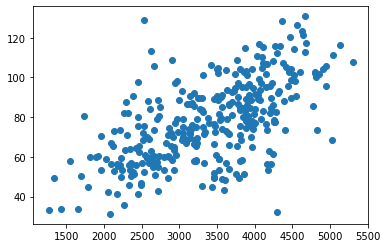

In [5]:
import matplotlib.pyplot
import pylab

cyields = []
ndvis = []

for a,b,c,d in yield_ndvi:
    cyields.append(a)
    ndvis.append(b)


matplotlib.pyplot.scatter(ndvis, cyields)
matplotlib.pyplot.show()

In [54]:
Map = geemap.Map()



dataset = ee.ImageCollection('NASA/NEX-GDDP').filter(ee.Filter.date('2018-01-01', '2018-12-31'))
minimumAirTemperature = dataset.select('tasmin').reduce(ee.Reducer.sum())
print(minimumAirTemperature)
minimumAirTemperatureVis = {'min': 240.0,
                            'max': 300.0,
                            'palette': ['blue', 'purple', 'cyan', 'green', 'yellow', 'red']}
Map.addLayer(minimumAirTemperature, {}, 'Minimum Air Temperature')







Map

ee.Image({
  "functionInvocationValue": {
    "functionName": "ImageCollection.reduce",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.map",
          "arguments": {
            "baseAlgorithm": {
              "functionDefinitionValue": {
                "argumentNames": [
                  "_MAPPING_VAR_0_0"
                ],
                "body": {
                  "functionInvocationValue": {
                    "functionName": "Image.select",
                    "arguments": {
                      "bandSelectors": {
                        "constantValue": [
                          "tasmin"
                        ]
                      },
                      "input": {
                        "argumentReference": "_MAPPING_VAR_0_0"
                      }
                    }
                  }
                }
              }
            },
            "collection": {
              "functionInvocat

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

### Dope Images

In [ ]:
Map = geemap.Map()


for crop_image, name in crop_images:

    Map.addLayer(crop_image, {}, name)

Map

In [6]:
# Visualize Images

In [7]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
import os

texture:  (245, 1014)
159


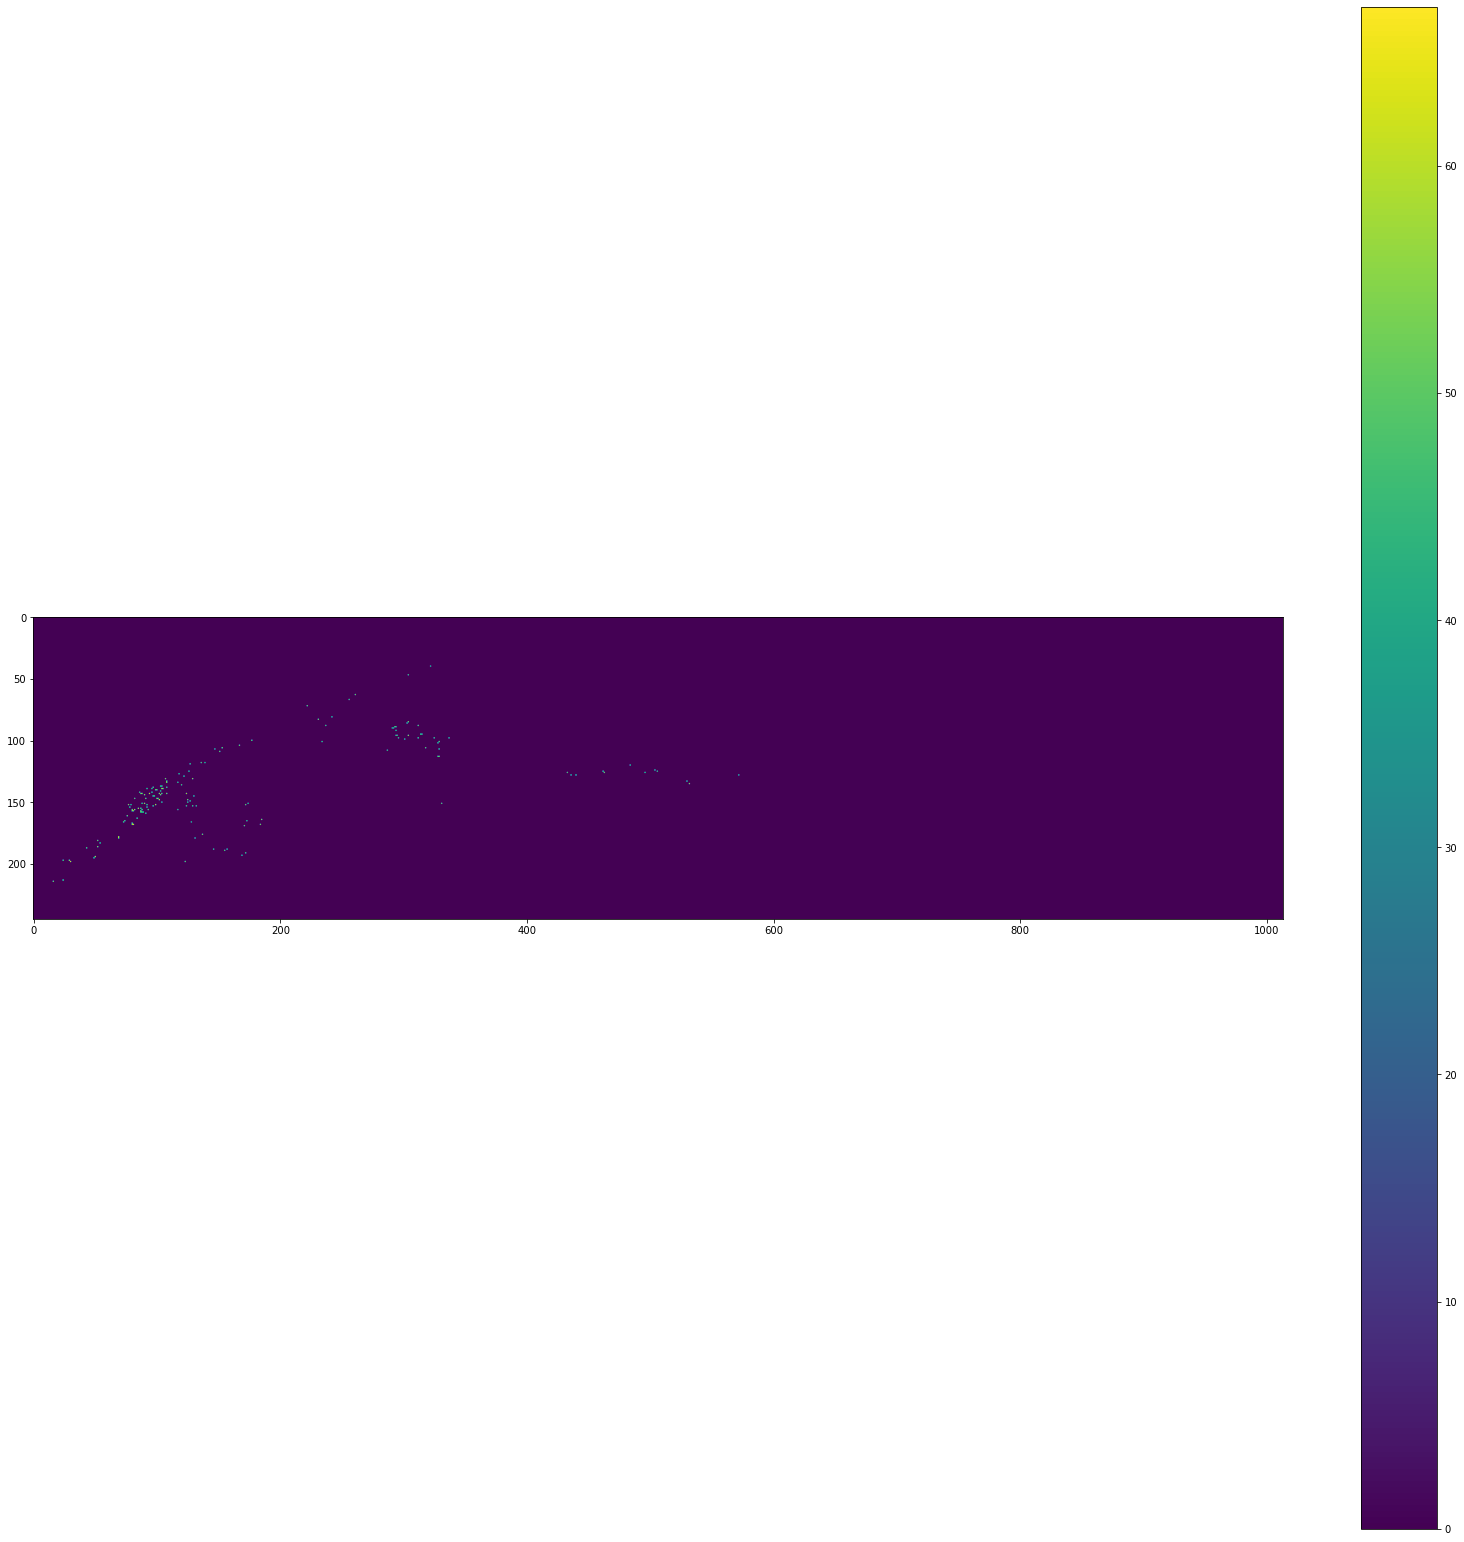

In [24]:
texture = './Oats_Bas-Saint-Laurent and Gaspesie-Iles de-la-Madelein_2013_fixed.tif'
texture = rasterio.open(texture)
texture = np.array(texture.read(7))
texture = np.nan_to_num(texture, nan=0)
print('texture: ', texture.shape)

# image_bands = np.concatenate((dynamic, fixed, texture), axis=0)
# image_bands = np.rollaxis(image_bands, 0, 3)
# print(image_bands.shape)

print(np.count_nonzero(texture))
plt.figure(figsize=(28, 28))
plt.imshow(texture)
plt.colorbar()
plt.show()
